<a href="https://colab.research.google.com/github/nitish6121999/Capstone-project-Bike-Sharing-Demand-prediction-project/blob/main/SUPERVISED_ML_BIKE_SHARING__PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Description**   



##### **Project Type**    - Supervised Machine Learning Regression
##### **Project Title -** - Bike Sharing Demand Prediction
##### **Contribution**    - Individual
##### **Created by -**    - Nitish N Naik


# **Project Summary -**

1. The goal of this project is to combine the historical bike usage patterns with
the weather data in order to forecast bike rental demand.

2. The dataset contains weather information (Temperature, Humidity, Windspeed,
Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.




# **GitHub Link -**

https://github.com/nitish6121999/Capstone-project-Bike-Sharing-Demand-prediction-project



# **Problem Statement**


Bike sharing systems have become increasingly popular in urban areas, providing an efficient and eco-friendly mode of transportation. To ensure optimal bike availability and meet customer demand, bike sharing companies **need accurate predictions** of bike rental demand at different locations and times.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [167]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ridge_regression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

### Dataset First View

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
path= '/content/drive/MyDrive/CAPSTONE PROJECTS/Project supervised ML :Bike sharing prediction/dataset for project/SeoulBikeData.csv'

bike_df=pd.read_csv(path, encoding='unicode_escape', parse_dates=[0])

In [170]:
# Dataset First Look
bike_df


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-01-12                254     0             -5.2           37   
1    2017-01-12                204     1             -5.5           38   
2    2017-01-12                173     2             -6.0           39   
3    2017-01-12                107     3             -6.2           40   
4    2017-01-12                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

### Dataset Rows & Columns count

In [171]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

### Dataset Information

In [172]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

Numerical features:- Rented Bike Count, Hour , Temperatures, Humidity, Wind Speed, Visibility, Dew point Temperatures, solar radiation, rainfall, and snowfall.

Categorical features :- Season, Holliday, Functioning day

#### Duplicate Values

In [173]:
# Dataset Duplicate Value Count

bike_df.duplicated().sum()


0

**There are no dupliacted values present.**

#### Missing Values/Null Values

In [174]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There are no missing values present in the dataset**

Text(0.5, 1.0, 'location of missing values')

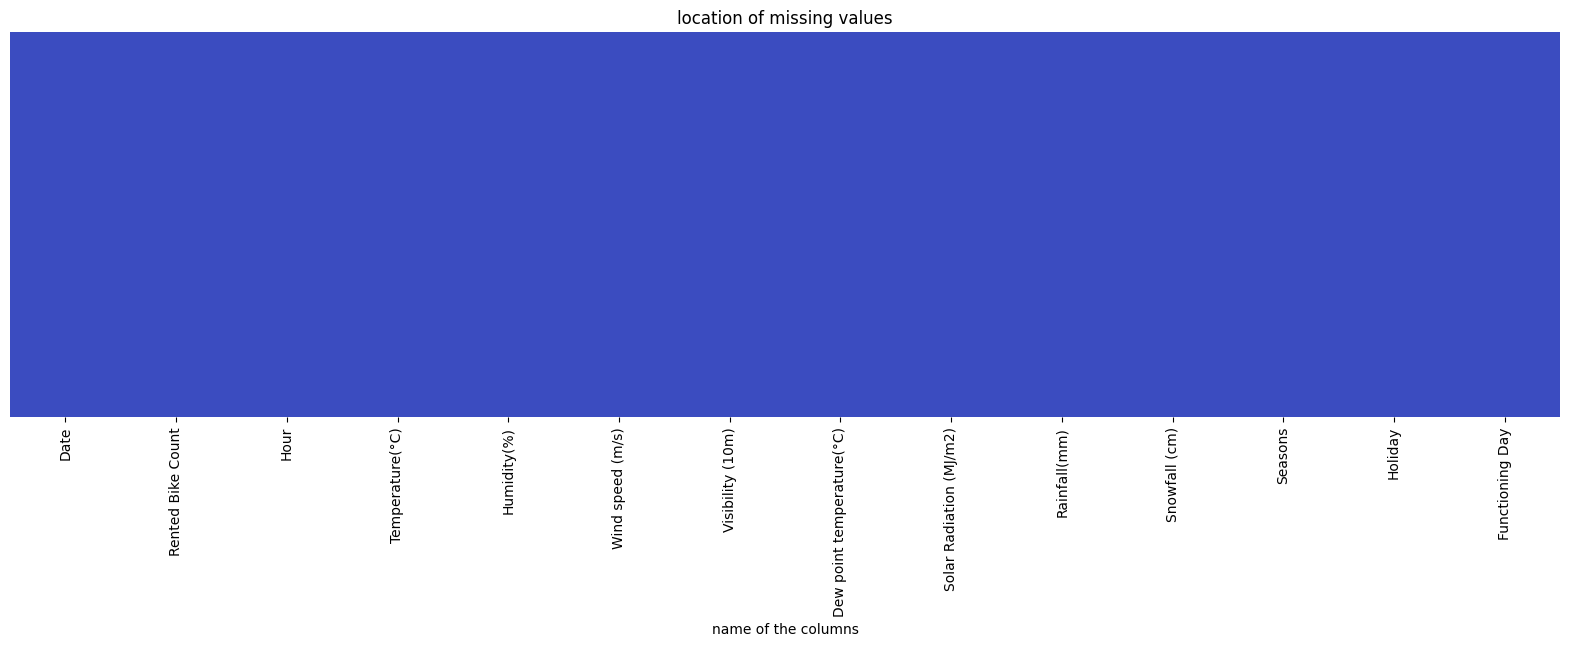

In [175]:
# Visualizing the missing values
plt.figure(figsize=(20,5))
sns.heatmap(bike_df.isnull(), cbar=False, yticklabels=False, cmap='coolwarm')
plt.xlabel('name of the columns')
plt.title('location of missing values')

**There is no indication of the missing values in the above showed graph.**

### What did you know about your dataset?

The dataset has more of the numerical columns and three of the categorical columns ,where in there is no problem for the duplicate values ,null values or the missing values  .

## ***2. Understanding Your Variables***

In [176]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [177]:
# Dataset Describe
bike_df.describe(include='all').T

count unique                  top  freq  \
Date                         8760    365  2017-01-12 00:00:00    24   
Rented Bike Count          8760.0    NaN                  NaN   NaN   
Hour                       8760.0    NaN                  NaN   NaN   
Temperature(°C)            8760.0    NaN                  NaN   NaN   
Humidity(%)                8760.0    NaN                  NaN   NaN   
Wind speed (m/s)           8760.0    NaN                  NaN   NaN   
Visibility (10m)           8760.0    NaN                  NaN   NaN   
Dew point temperature(°C)  8760.0    NaN                  NaN   NaN   
Solar Radiation (MJ/m2)    8760.0    NaN                  NaN   NaN   
Rainfall(mm)               8760.0    NaN                  NaN   NaN   
Snowfall (cm)              8760.0    NaN                  NaN   NaN   
Seasons                      8760      4               Spring  2208   
Holiday                      8760      2           No Holiday  8328   
Functioning Day              8760      2                  Yes  8465   

                               first       last         mean         std  \
Date                      2017-01-12 2018-12-11          NaN         NaN   
Rented Bike Count                NaT        NaT   704.602055  644.997468   
Hour                             NaT        NaT         11.5    6.922582   
Temperature(°C)                  NaT        NaT    12.882922   11.944825   
Humidity(%)                      NaT        NaT    58.226256   20.362413   
Wind speed (m/s)                 NaT        NaT     1.724909      1.0363   
Visibility (10m)                 NaT        NaT  1436.825799  608.298712   
Dew point temperature(°C)        NaT        NaT     4.073813   13.060369   
Solar Radiation (MJ/m2)          NaT        NaT     0.569111    0.868746   
Rainfall(mm)                     NaT        NaT     0.148687    1.128193   
Snowfall (cm)                    NaT        NaT     0.075068    0.436746   
Seasons                          NaT        NaT          NaN         NaN   
Holiday                          NaT        NaT          NaN         NaN   
Functioning Day                  NaT        NaT          NaN         NaN   

                            min    25%     50%      75%     max  
Date                        NaN    NaN     NaN      NaN     NaN  
Rented Bike Count           0.0  191.0   504.5  1065.25  3556.0  
Hour                        0.0   5.75    11.5    17.25    23.0  
Temperature(°C)           -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)            0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C) -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)     0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)               0.0    0.0     0.0      0.0     8.8  
Seasons                     NaN    NaN     NaN      NaN     NaN  
Holiday                     NaN    NaN     NaN      NaN     NaN  
Functioning Day             NaN    NaN     NaN      NaN     NaN

### Variables Description


🔶: Date :- year-month-day

🔶: Rented Bike count :- Count of bikes rented at each hour

🔶: Hour :- Hour of he day (0 to 23)

🔶: Temperature :-Temperature of the day in degree celsius

🔶: Humidity :- Humidity measurement in %

🔶: Windspeed :- windspeed in m/s

🔶: Visibility :-Visibility measurement around 10meter

🔶: Dew point temperature :- Dew point measurement in degree Celsius

🔶: Solar radiation :- Solar radiation measureent in MJ/m2 (i.e. Megajules per meter square)

🔶: Rainfall :- Rainfall measurement in mm

🔶: Snowfall :- Snowfall measurement in cm

🔶: Seasons :- Winter, Spring, Summer, Fall or Autumn

🔶: Holiday :- Holiday/No holiday

🔶: Functional Day :- No Func(Non Functional Hours), Fun(Functional hours)





### Check Unique Values for each variable.

In [178]:
# Check Unique Values for each variable.
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [179]:
# Write your code to make your dataset analysis ready.
bike_df['Year']=bike_df['Date'].map(lambda x: x.year).astype('object')
bike_df['Month']=bike_df['Date'].dt.month_name()
bike_df['Day']=bike_df['Date'].dt.day_name()


In [180]:
bike_df.head()


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Year    Month       Day  
0             Yes  2017  January  Thursday  
1             Yes  2017  January  Thursday  
2             Yes  2017  January  Thursday  
3             Yes  2017  January  Thursday  
4             Yes  2017  January  Thursday

**Since we have converted Date columns into three respective year, month, day columns.**
**So no need of Date column in dataframe so we will drop it.**


In [181]:
bike_df.drop(columns="Date", inplace=True)

In [182]:
#Changing "Hour" column -->'int' dtype into 'object' dtype

bike_df['Hour']=bike_df['Hour'].astype(object)

In [183]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   objec

### What all manipulations have you done and insights you found?

Number of Numerical Features = 9

Number of Categorical Features = 7.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1: PAIRPLOT (for how the features are related with each other)

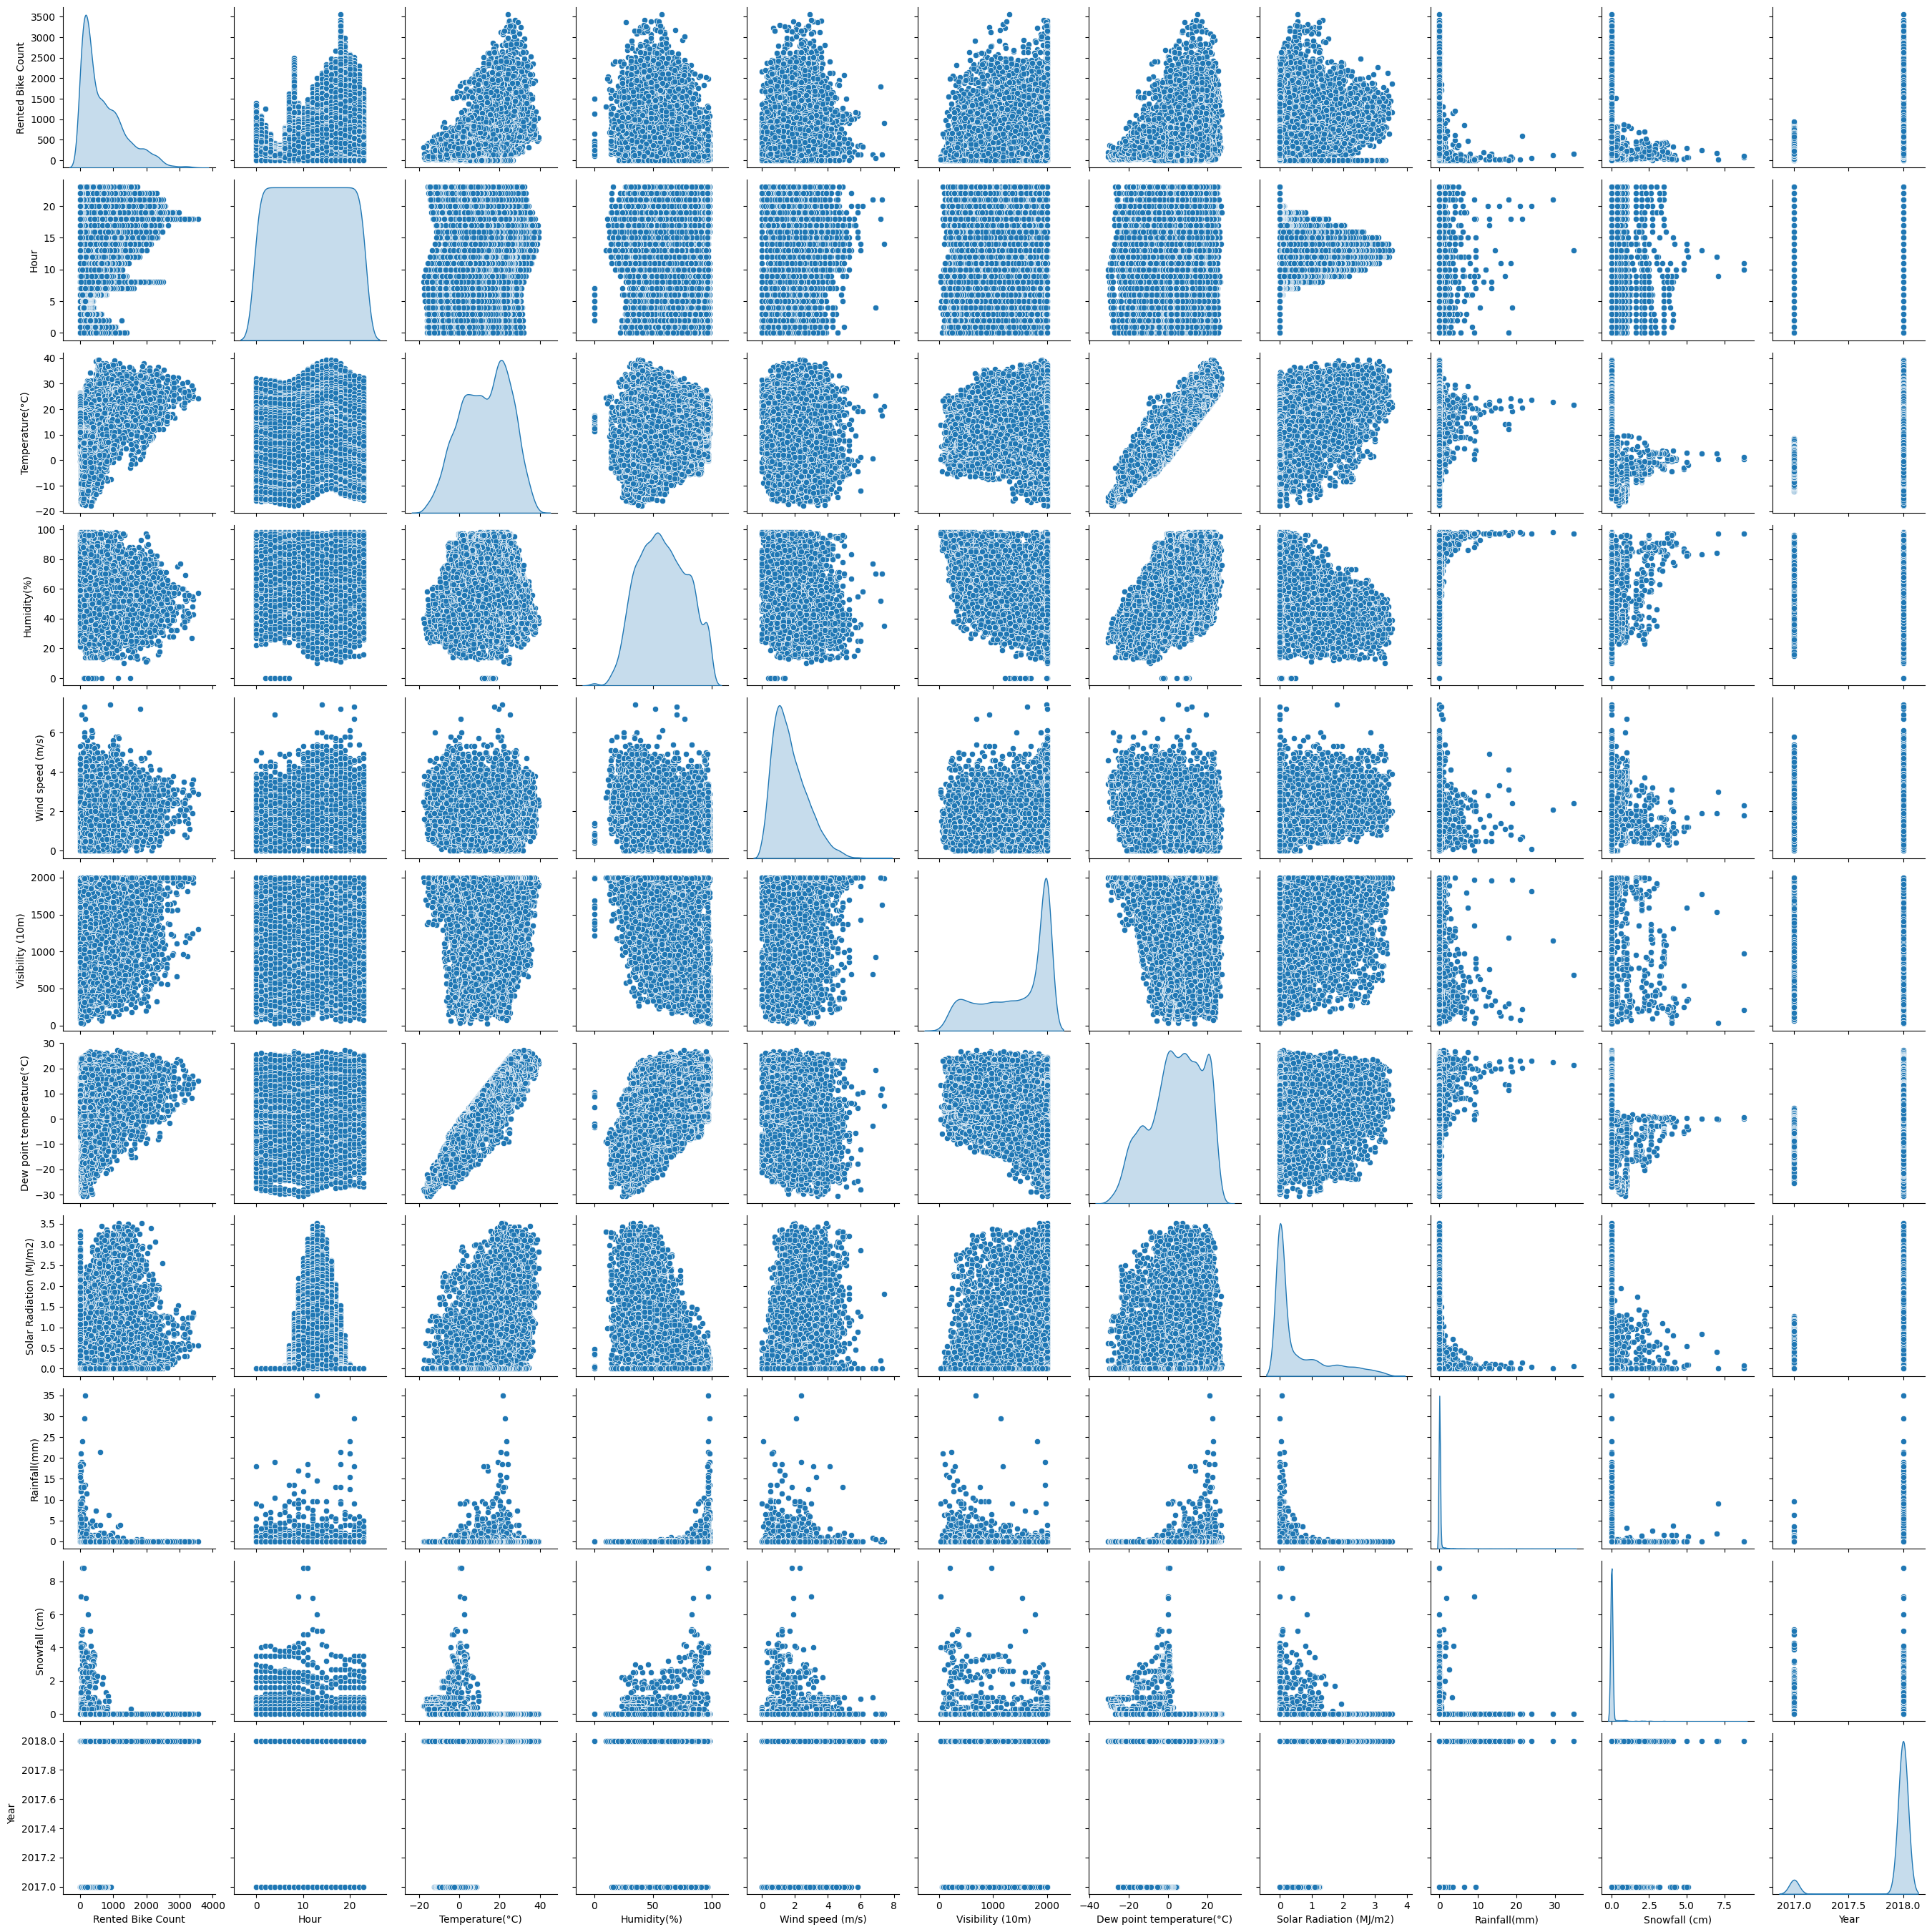

In [184]:
# Chart - 1 visualization code
sns.pairplot(bike_df, diag_kind= 'kde')

##### 1. Why did you pick the specific chart?

WE can understand how data is distributed across the dataset

**Storing Numerical and Categorical columns separately**

In [185]:
numeric_col= bike_df.describe().columns

categorical_col= bike_df.describe(include=['object','category']).columns

In [186]:
numeric_col

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [187]:
len(numeric_col)

9

In [188]:
categorical_col

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Year', 'Month',
       'Day'],
      dtype='object')

In [189]:
len(categorical_col)

7

# **Chart - Analysis of Categorical columns**



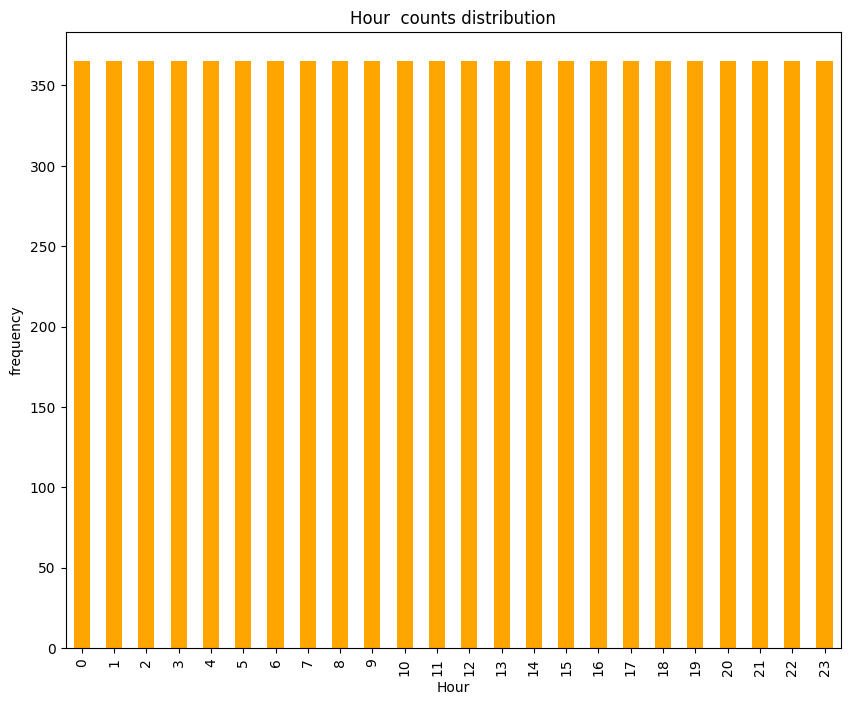

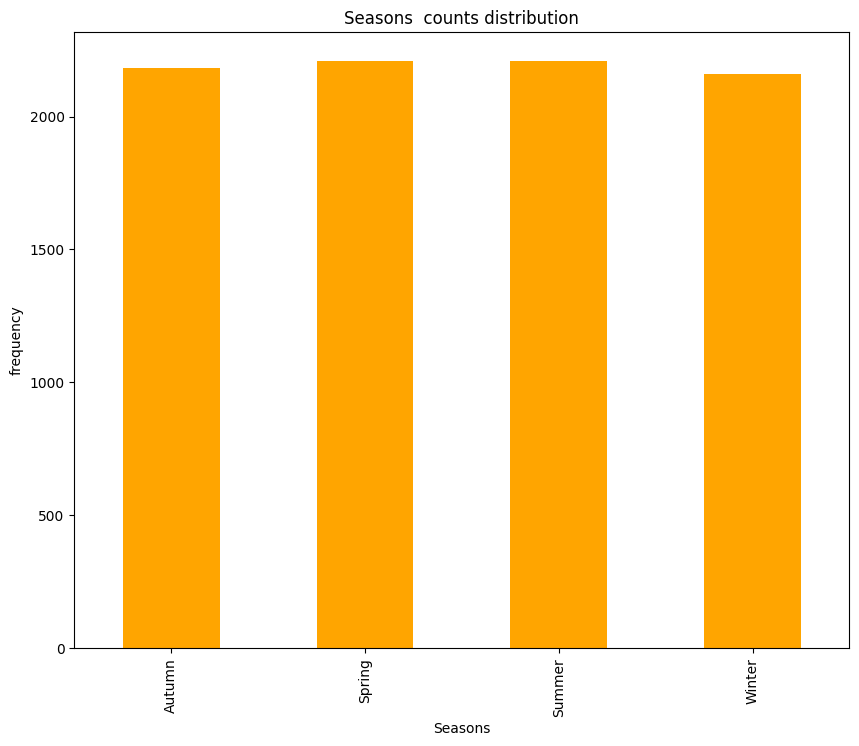

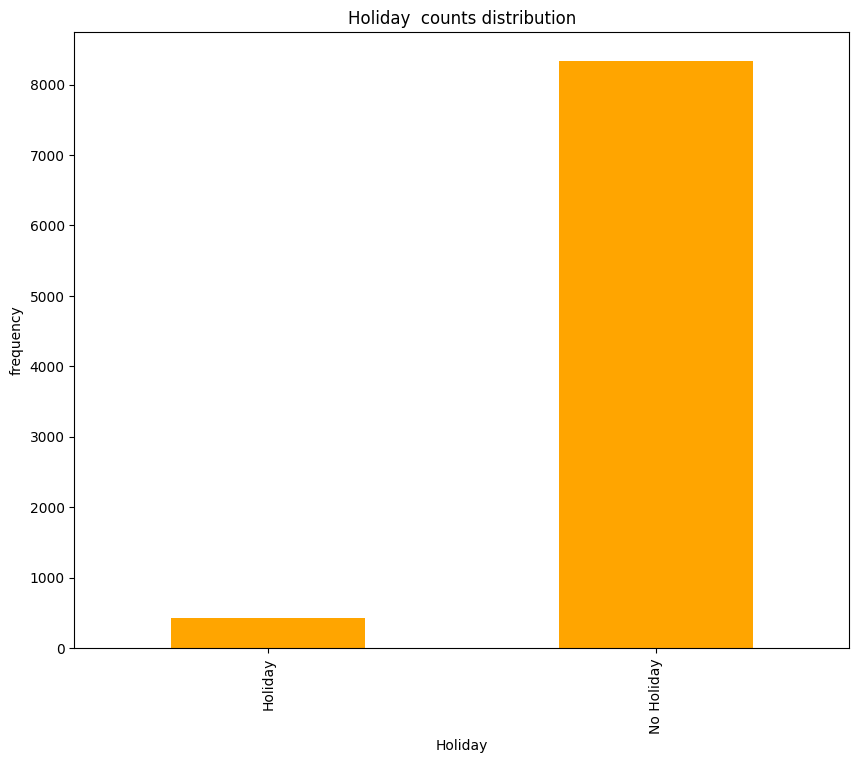

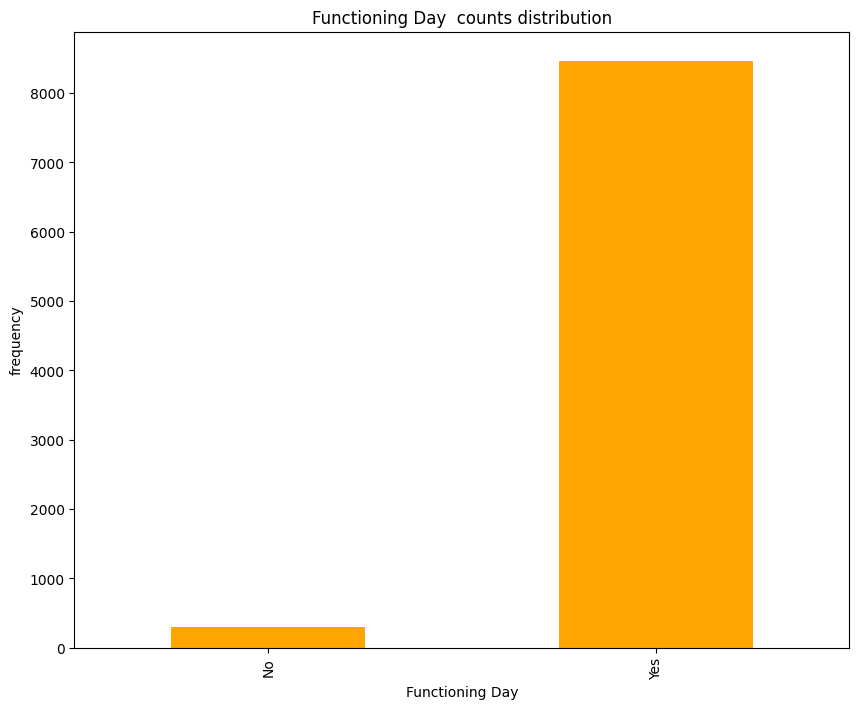

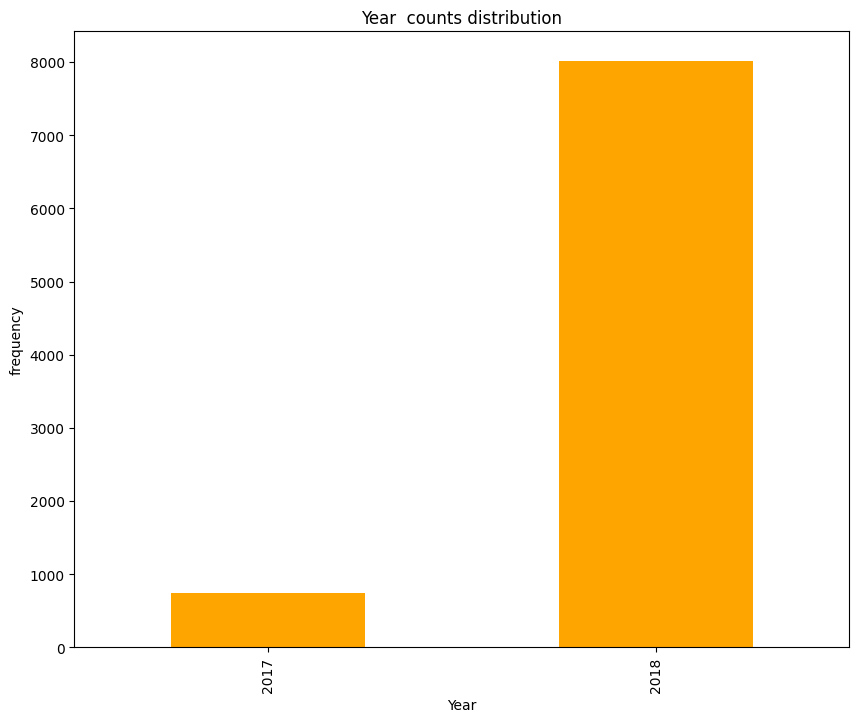

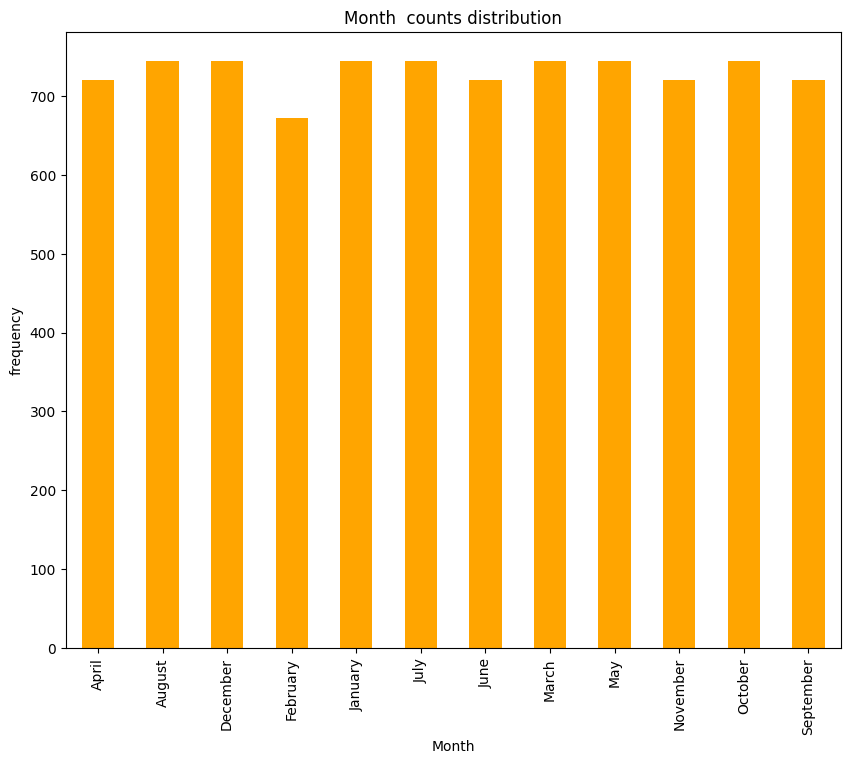

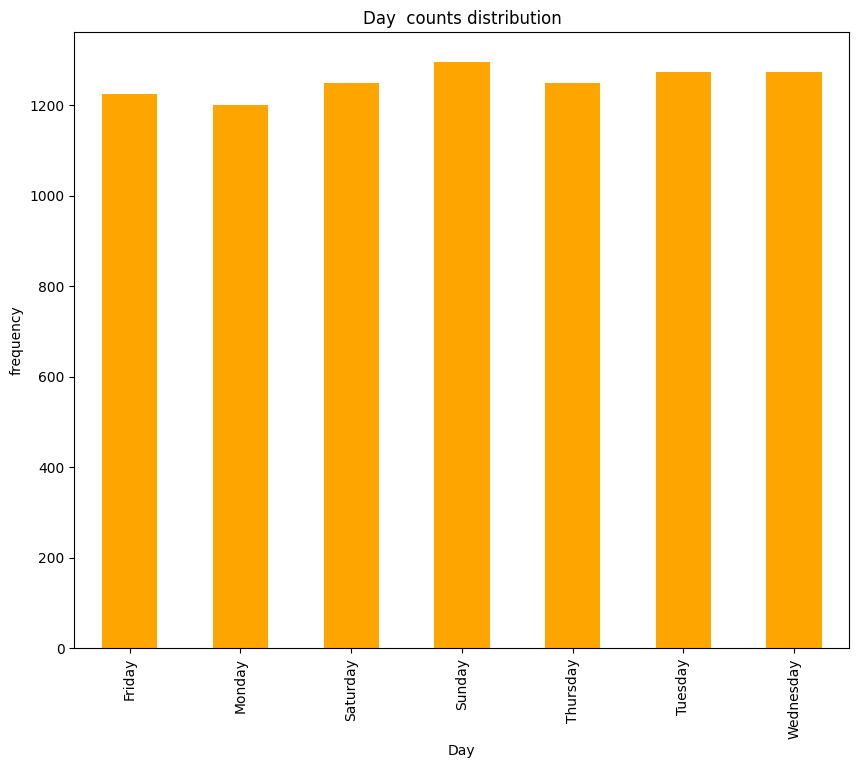

In [190]:
# Charts

for col in categorical_col:
  counts = bike_df[col].value_counts().sort_index()
  fig = plt.figure(figsize=(10,8))
  ax = fig.gca()
  counts.plot.bar(ax=ax,color='orange')
  ax.set_title(col+'  counts distribution')
  ax.set_xlabel(col)
  ax.set_ylabel('frequency')

plt.show()

##### 1. Why did you pick the specific chart?

Column chart could easily exlain the categorical columns all in one go .

##### 2. What is/are the insight(s) found from the chart?

From the above graphs

1.  Season distribution is evenly distributed across all the four seasons

2.  In Holiday columns ,most of the data is from the Non_holiday section

3.  In Function column, most of the data is from the functioning day

4.  Most of the data is from the year 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

According to yearly data ,2018 have been the opening year for the demand in the bikes, from this it can be predicted that there will be a upward graphs for the coming years.

Bikes are in demand for the functioning day and when there is no holidays , so the analysis could be helpful for the business to fulfill the need if there is  shortage of bikes in any of the loactions and for that particular time.

# **Chart - Understanding how the categorical columns are related with the dependent variable on the hourly basis.**

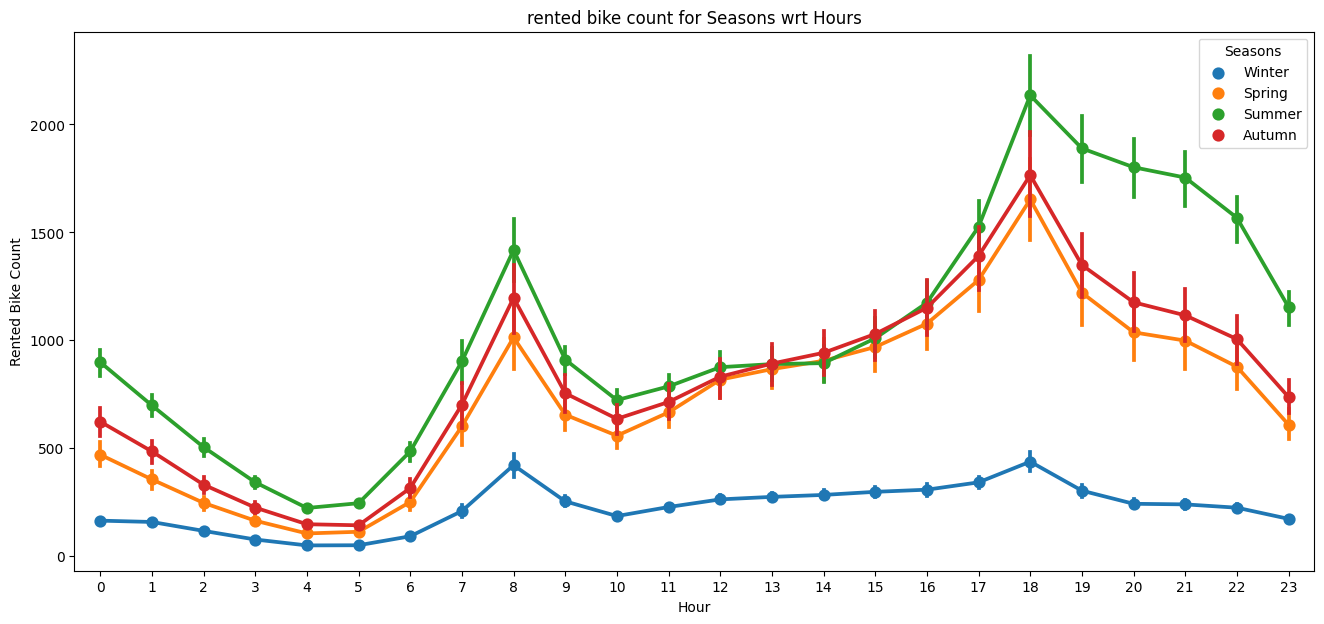

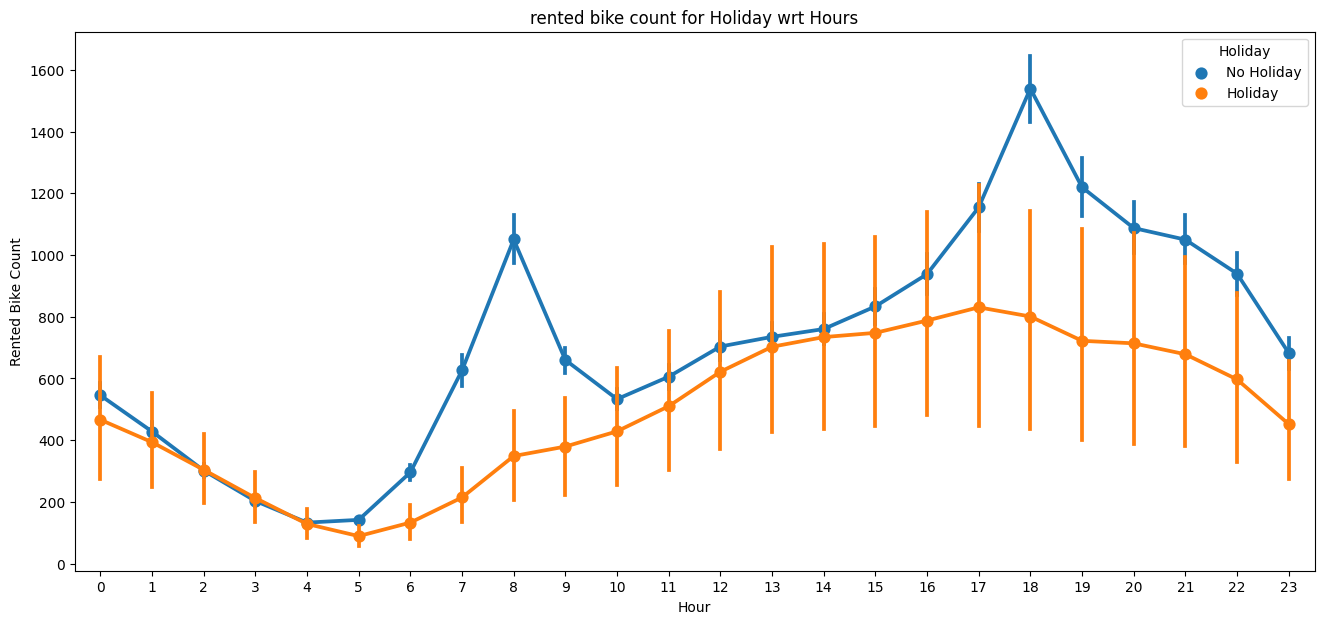

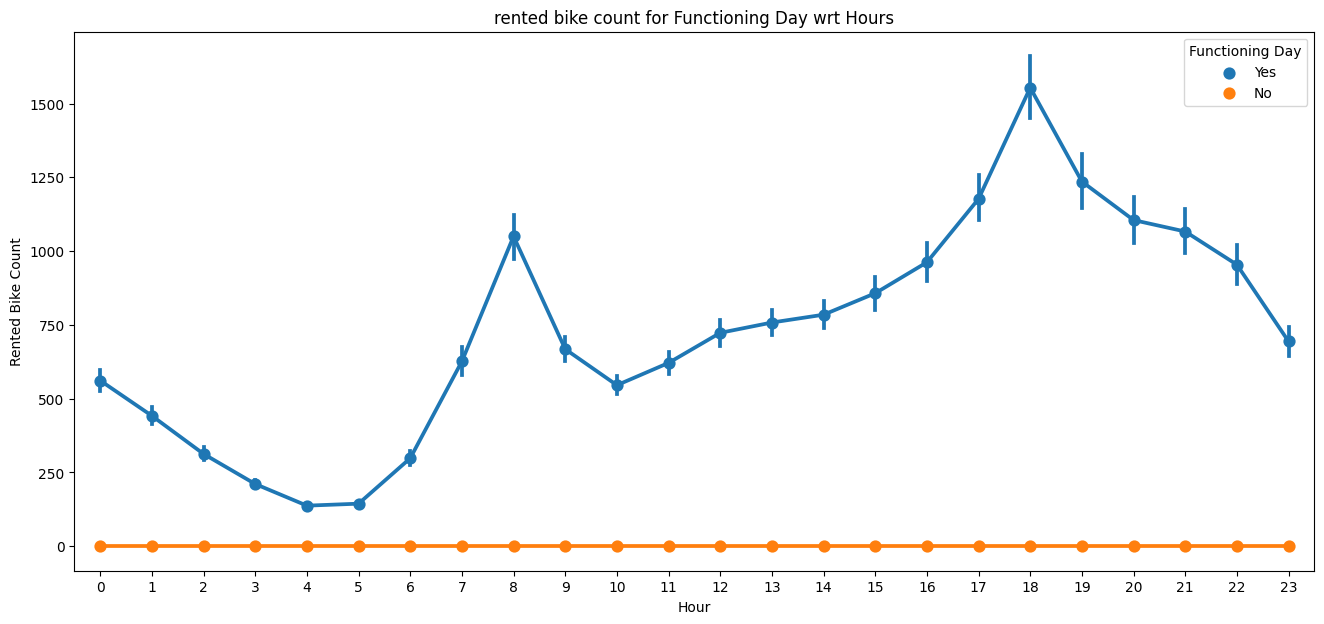

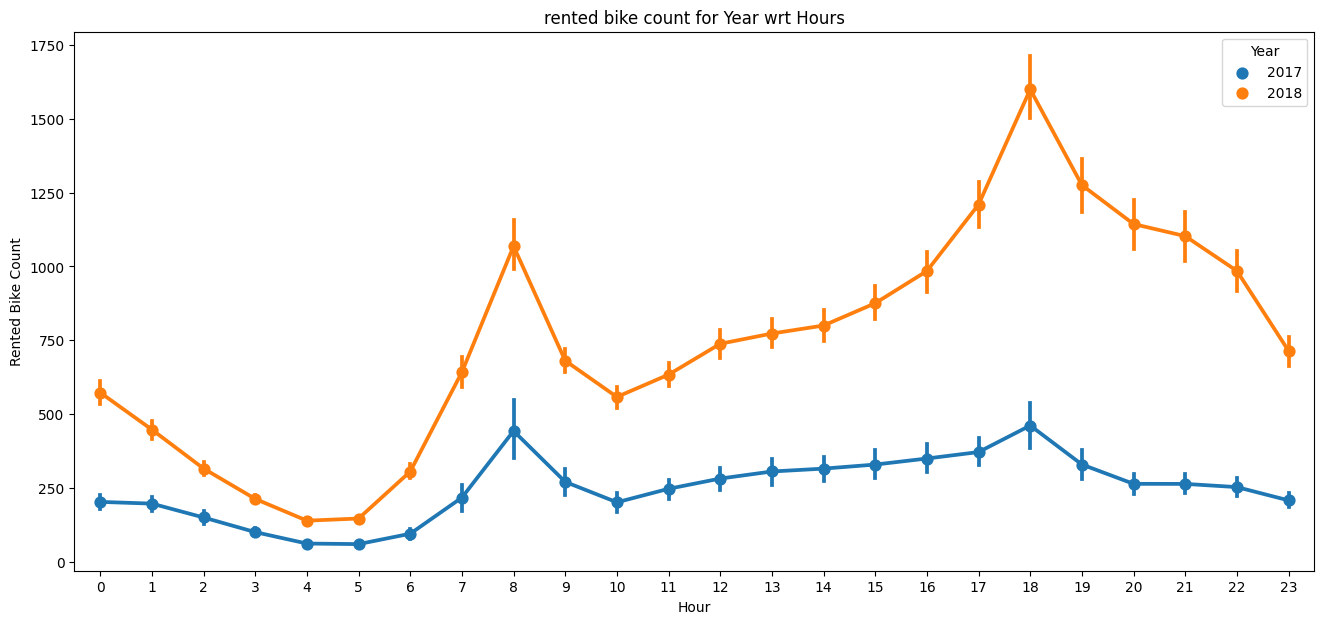

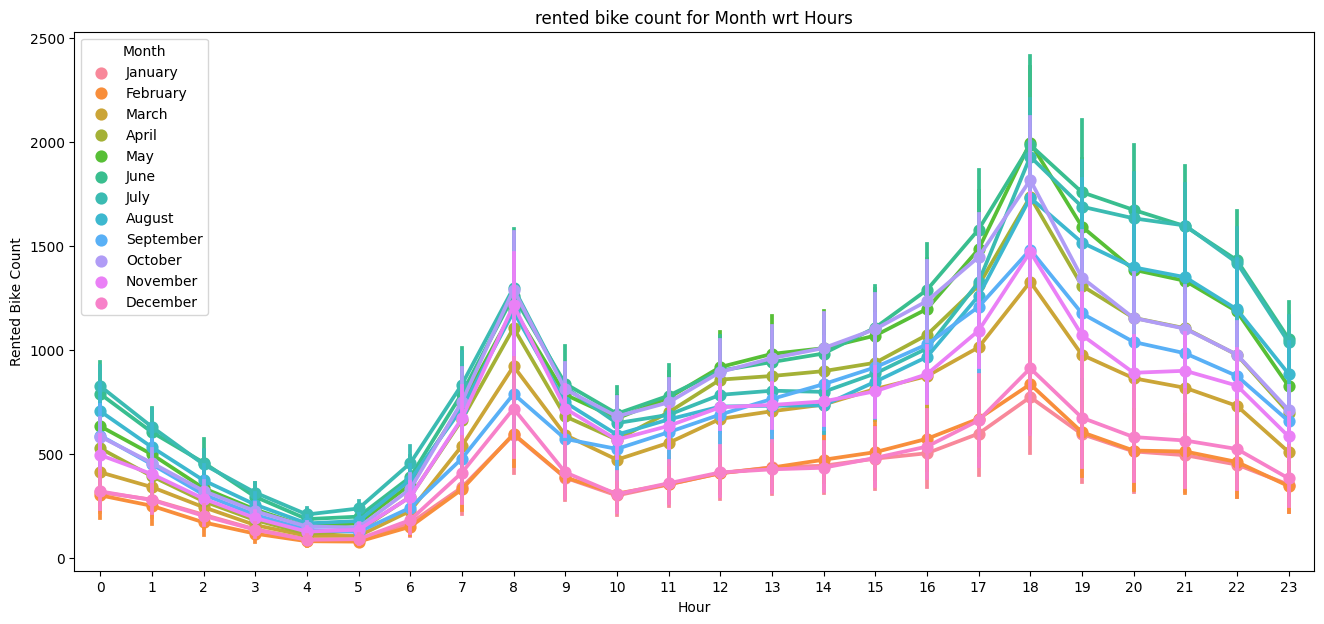

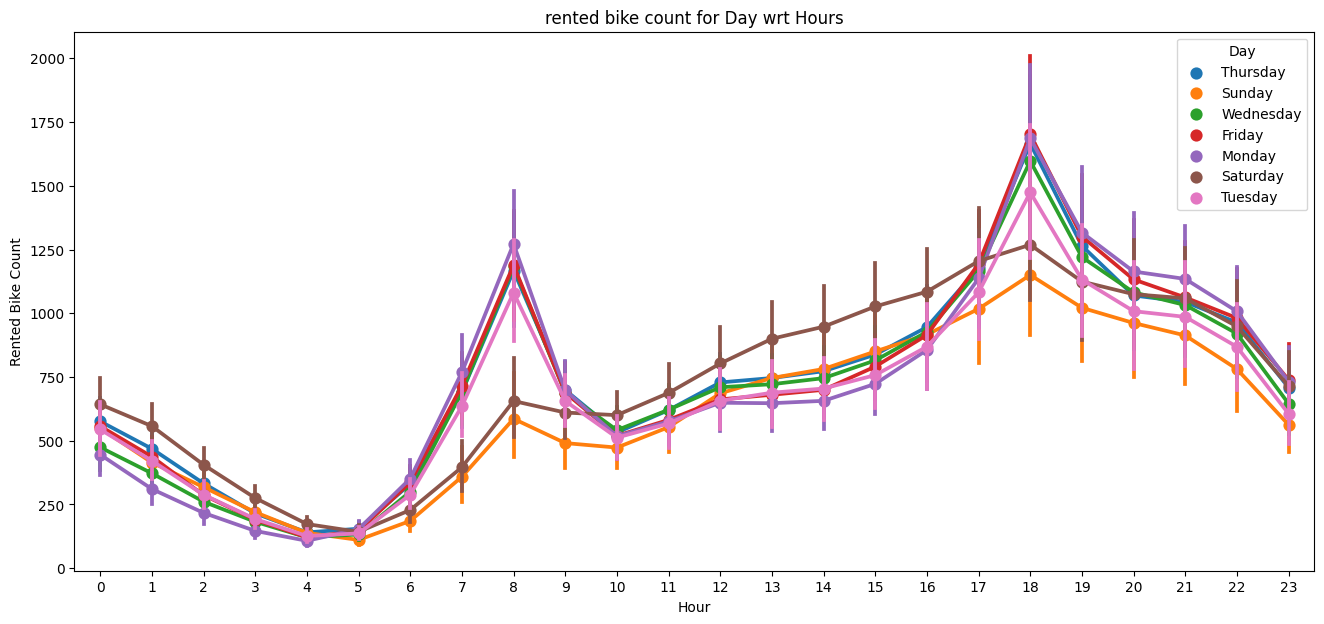

In [191]:
for col in categorical_col:
  if col == "Hour":
    pass

  else:
    plt.figure(figsize=(16,7))
    sns.pointplot(x=bike_df['Hour'], y=bike_df['Rented Bike Count'], hue=bike_df[col])
    plt.title(f'rented bike count for {col} wrt Hours')

  plt.show()

Analysis of the Rented bike count for different columns with respect to time .


*   For Season column, there is a clear difference in the count of the Rented bike count in SUMMER(more count) and WINTER seasons(less count)

*   During No holidays and Functioning days there is more count in the Rented bikes

*   IN 2018 there is more usage of bikes compaered to 2017, may be because in 2018 most of them were aware of the rented bikes then in 2017

*   In the Month columns ,the usage of bikes in the november ,december and january is very low then rest of the months , there is high usage in the summer months.


*   In the week columns , only in the weekends there is lower line ,rest of the days are quite similar as those are the functiong days

*   Considering all the columns ,the 8th Hour and 18th Hour are the peak time of the bike usage because of the office working hours







     

##### 1. Why did you pick the specific chart?

This chart can explian the different columns wrt to the dependent variable and Hour columns

##### 2. What is/are the insight(s) found from the chart?

Analysis of the Rented bike count for different columns with respect to time .


*   For Season column, there is a clear difference in the count of the Rented bike count in SUMMER(more count) and WINTER seasons(less count)

*   During No holidays and Functioning days there is more count in the Rented bikes

*   IN 2018 there is more usage of bikes compaered to 2017, may be because in 2018 most of them were aware of the rented bikes then in 2017

*   In the Month columns ,the usage of bikes in the november ,december and january is very low then rest of the months , there is high usage in the summer months.


*   In the week columns , only in the weekends there is lower line ,rest of the days are quite similar as those are the functiong days

*   Considering all the columns ,the 8th Hour and 18th Hour are the peak time of the bike usage because of the office working hours







     

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights clearly help positive business impact and also help tackle the negative impacts on business

#### Chart -4 Feature Engineering on Hour column

Since hour column contains 0 to 23 hours data so if we divide these hourly data into sessions i.e. [ morning , afternoon, evening, night ]. then it will be better to analyze when number of bike count is maximum and minimum.

In [192]:
def hour(h):

  if h >= 7 and h <=10:
    return 'Morning'

  elif h>=11 and h<=16:
    return 'Afternoon'

  elif h>=17 and h<=22:
    return 'Evening'

  else:
    return 'Night'

In [193]:
bike_df['Hour']=bike_df['Hour'].apply(hour)

In [194]:
bike_df['Hour'].value_counts()


Night        2920
Afternoon    2190
Evening      2190
Morning      1460
Name: Hour, dtype: int64

Checking if some outliers present in categroical features wrt dependent variable.

# **Chart  : To detect the outliers in the dataset**



====================================================================== Hour ======================================================================




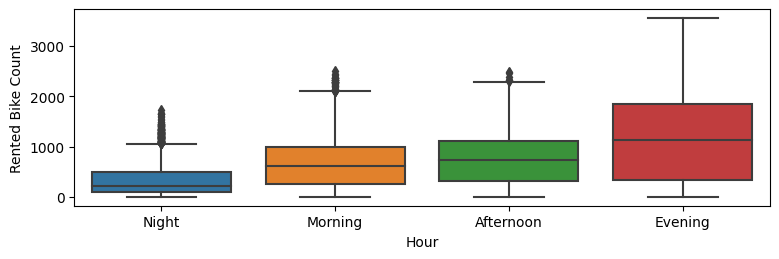



====================================================================== Seasons ======================================================================




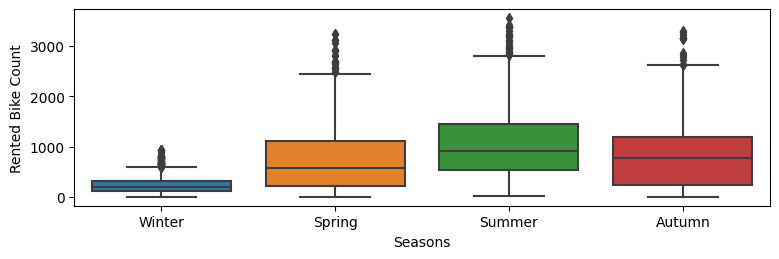



====================================================================== Holiday ======================================================================




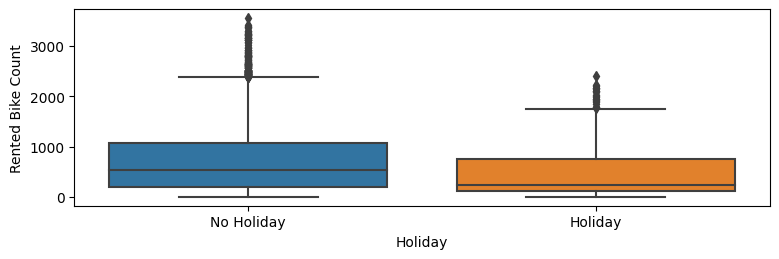



====================================================================== Functioning Day ======================================================================




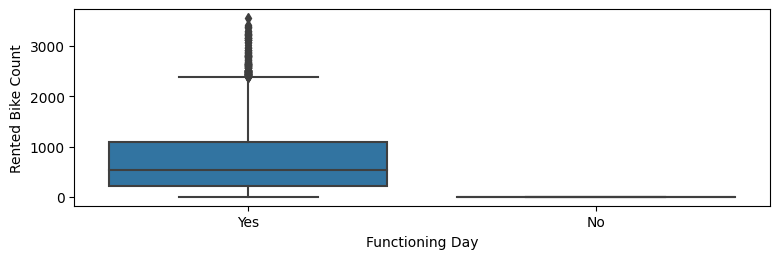



====================================================================== Year ======================================================================




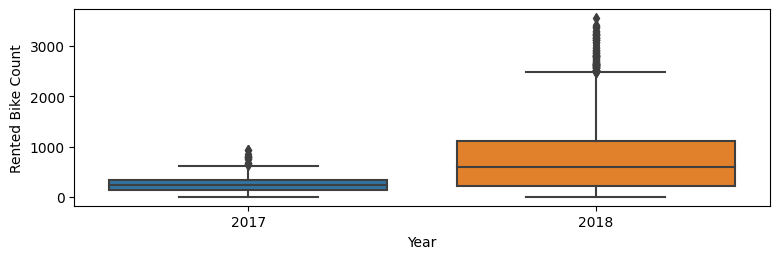



====================================================================== Month ======================================================================




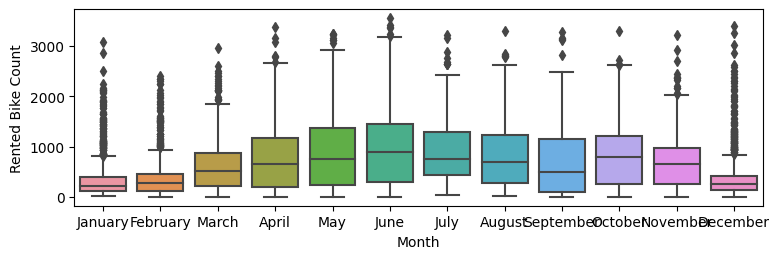



====================================================================== Day ======================================================================




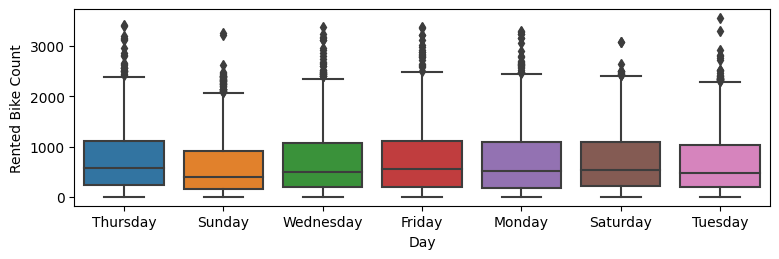

In [195]:
# Chart - 5 visualization code

n=1
for col in categorical_col:
  plt.figure(figsize=(15,15))
  plt.subplot(6,2,n)
  n+=1
  print('\n')
  print('='*70,col,'='*70)
  print('\n')
  sns.boxplot(x=bike_df[col],y=bike_df["Rented Bike Count"])
  plt.tight_layout()
  plt.show()

In the above box plot we detect some outliers and it can be removed by IQR method, but here in seoul dataset we are not removing outliers because in features these outliers are not causing much skewness to our data.

##### 1. Why did you pick the specific chart?

To know the outliers in the dataset

##### 2. What is/are the insight(s) found from the chart?

Some the boxes in the columns have outliers .

# Categoring the weekend and weekdays

In [196]:
bike_df['week']=bike_df['Day'].apply(lambda x: 'weekend' if x=='sunday' and x=='saturday' else 'weekdays')
bike_df.drop(columns=['Day'], inplace=True)
bike_df.head()


Rented Bike Count   Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254  Night             -5.2           37               2.2   
1                204  Night             -5.5           38               0.8   
2                173  Night             -6.0           39               1.0   
3                107  Night             -6.2           40               0.9   
4                 78  Night             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Year  \
0           0.0            0.0  Winter  No Holiday             Yes  2017   
1           0.0            0.0  Winter  No Holiday             Yes  2017   
2           0.0            0.0  Winter  No Holiday             Yes  2017   
3           0.0            0.0  Winter  No Holiday             Yes  2017   
4           0.0            0.0  Winter  No Holiday             Yes  2017   

     Month      week  
0  January  weekdays  
1  January  weekdays  
2  January  weekdays  
3  January  weekdays  
4  January  weekdays

In [197]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   objec

In [198]:
bike_df.shape

(8760, 16)

In [199]:
categorical_col

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Year', 'Month',
       'Day'],
      dtype='object')

In [200]:
categorical_col=categorical_col.drop('Day')

In [201]:
categorical_col


Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Year', 'Month'], dtype='object')

# **Chart : Data distribution Percentage**

In [202]:
# Chart - 6 visualization code
n=1
plt.figure(figsize=(15,15))
for col in categorical_col:
  plt.subplot(4,2,n)
  n=n+1
  plt.pie(bike_df[col].value_counts(),labels = bike_df[col].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(col)
  plt.tight_layout()


##### 1. Why did you pick the specific chart?

Pie chart displays the dataset distribution in percentage .

##### 2. What is/are the insight(s) found from the chart?

There is proper distirbution of the data ,there is no noisy distribution of the data.

## **Till here we have understood how Categorical columns data is distributed and the relation with dependent variable.**

# Chart  : ANALYSE NUMERICAL COLUMNS

In [203]:
numeric_col

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

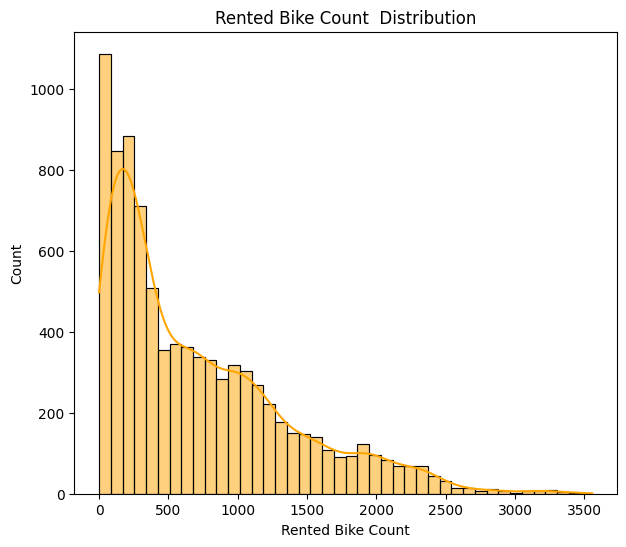

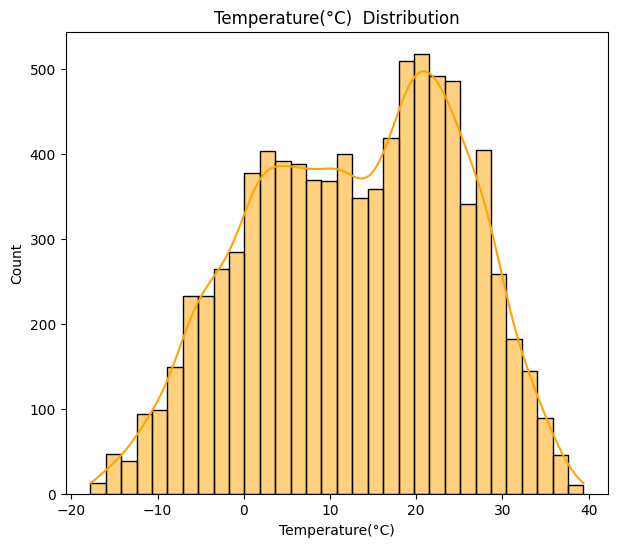

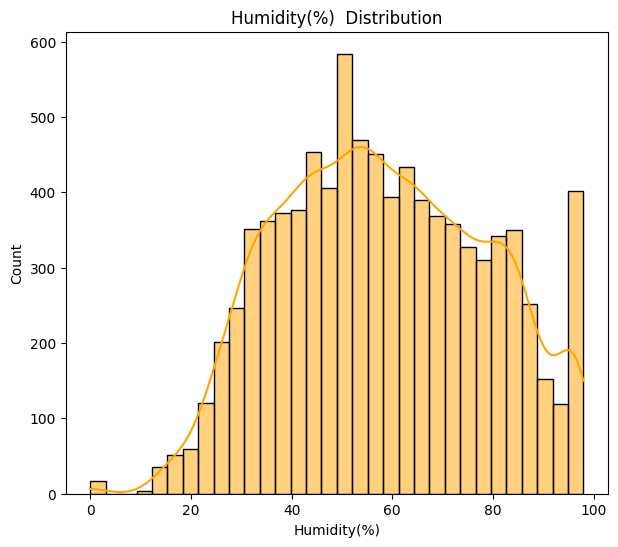

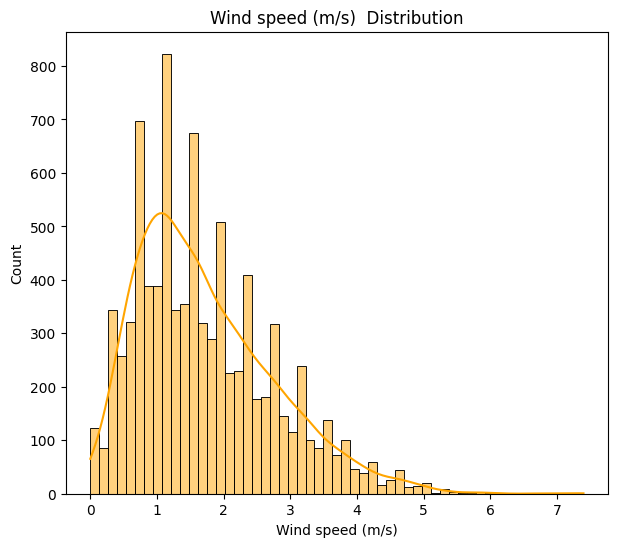

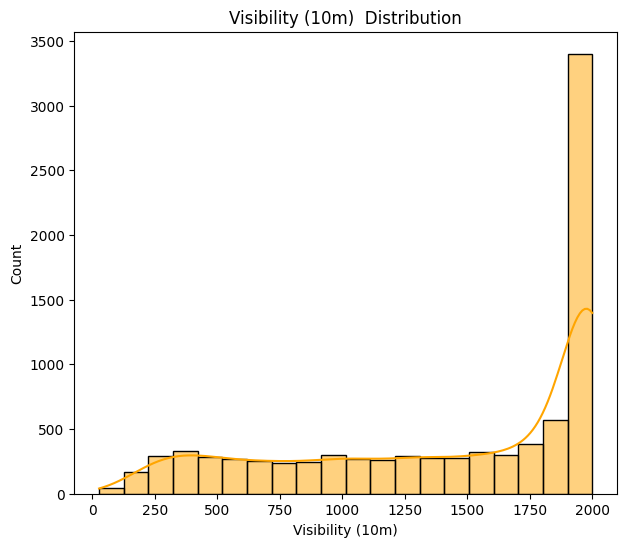

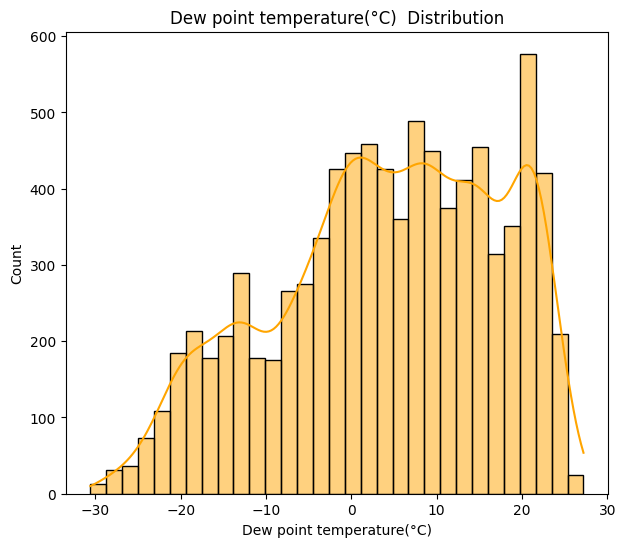

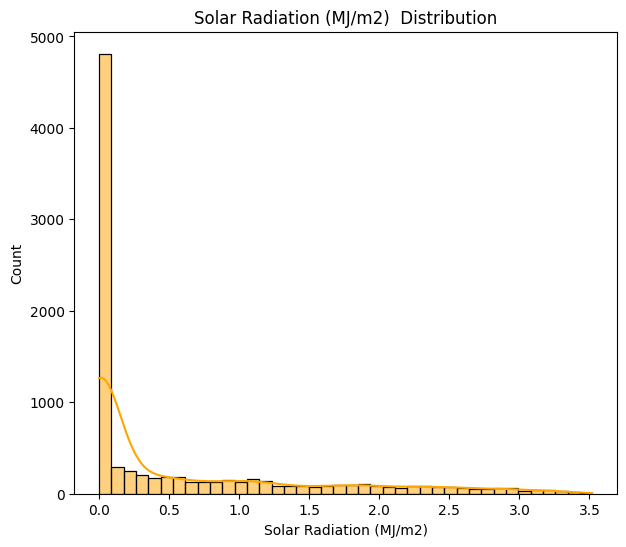

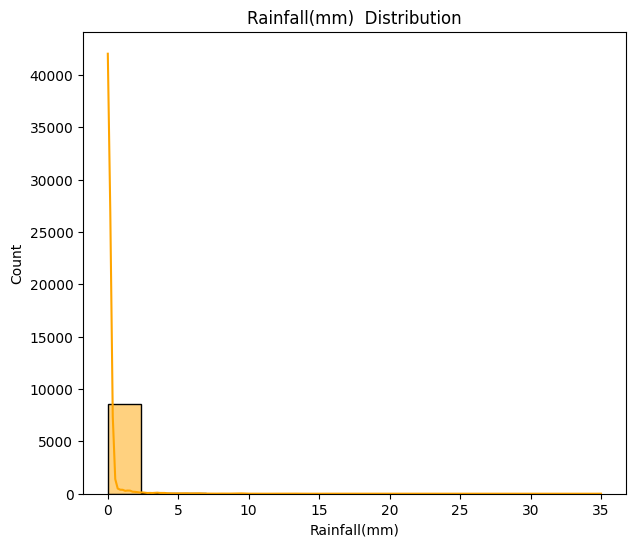

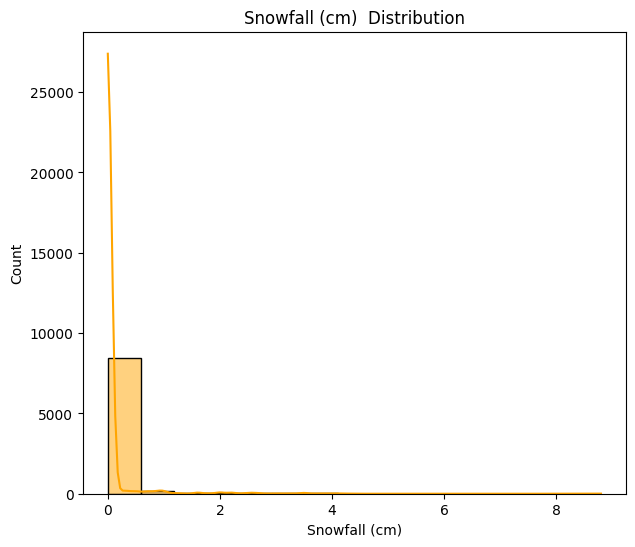

In [204]:
# Chart - 7 visualization code

for col in numeric_col:
    fig = plt.figure(figsize=(7, 6))
    ax = fig.gca()
    feature = bike_df[col]
    sns.histplot(data=bike_df,x=col ,ax = ax,color='Orange', kde=True)
    plt.title(col + '  Distribution')

plt.show()

##### 1. Why did you pick the specific chart?

From the above graphs we can see that there are a lot of attributes which are positively and negatively distributed.

so these types of features distribution will not give better results and will not give better understanding about model.

so to get better result we need to normalize data by using transformations.

##### 2. What is/are the insight(s) found from the chart?

These are the methods which can deal with skewness of the data

**square-root for moderate skew** :- sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew** :- log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew** :- 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity** :- First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

Above methods can provide good outcomes but we have to perform different transformation for different skewed data to make normaly distributed data.

Instead of this long process we can use ***power transformation*** on features to make them in normal distribution to give better visualisation.

# **Chart  : RELATION BETWEEN THE NUMERICAL COLUMNS AND DEPENDENT VARIABLE**


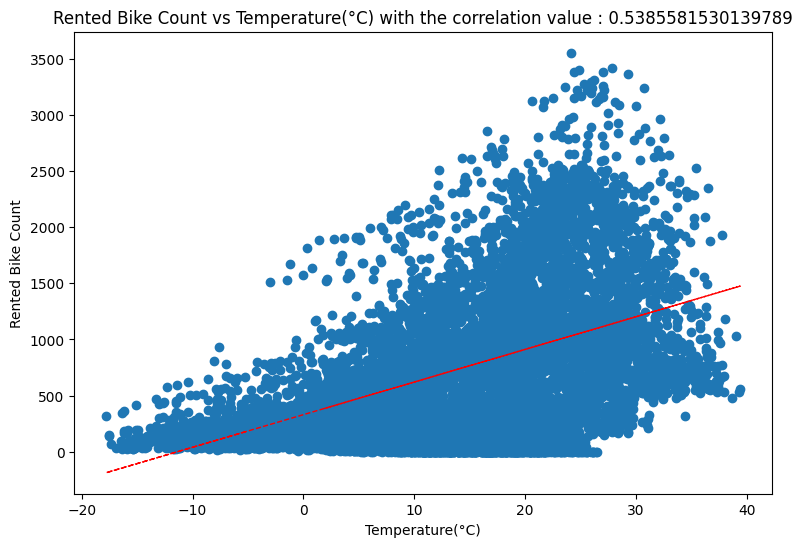

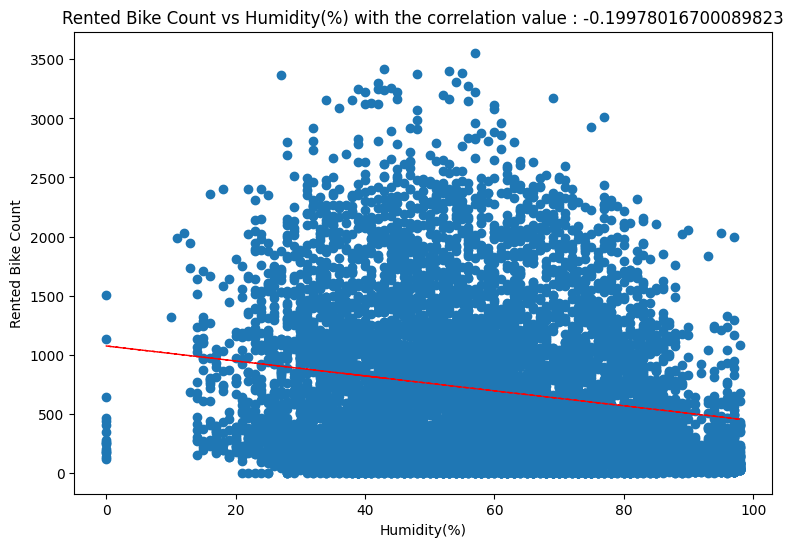

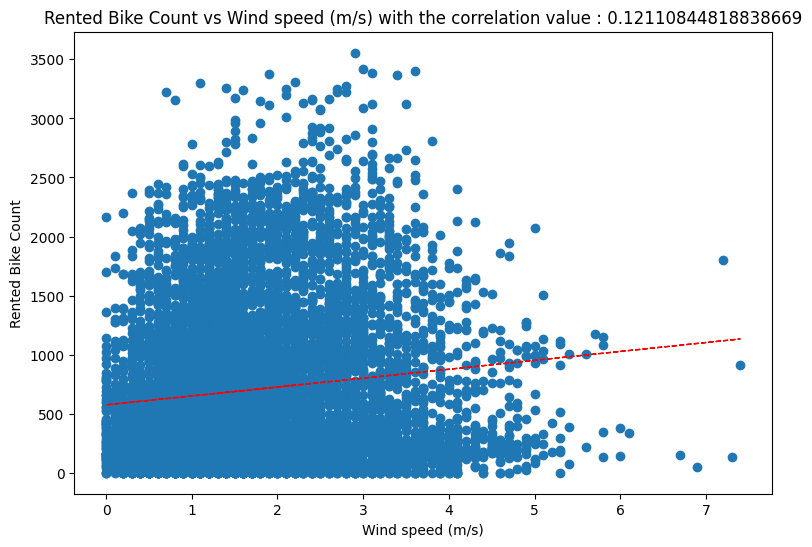

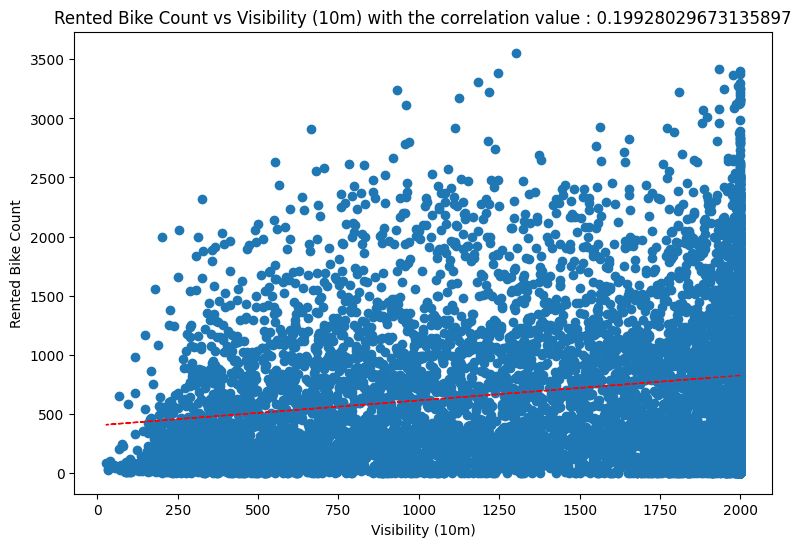

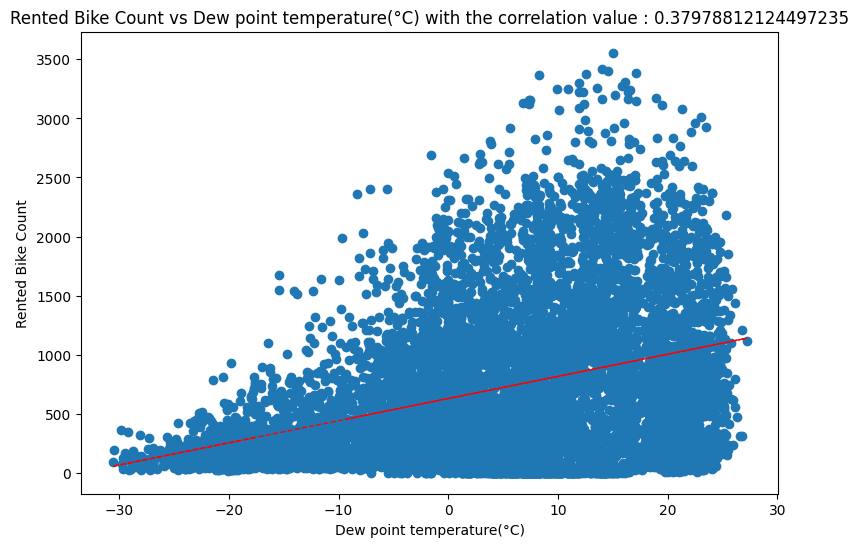

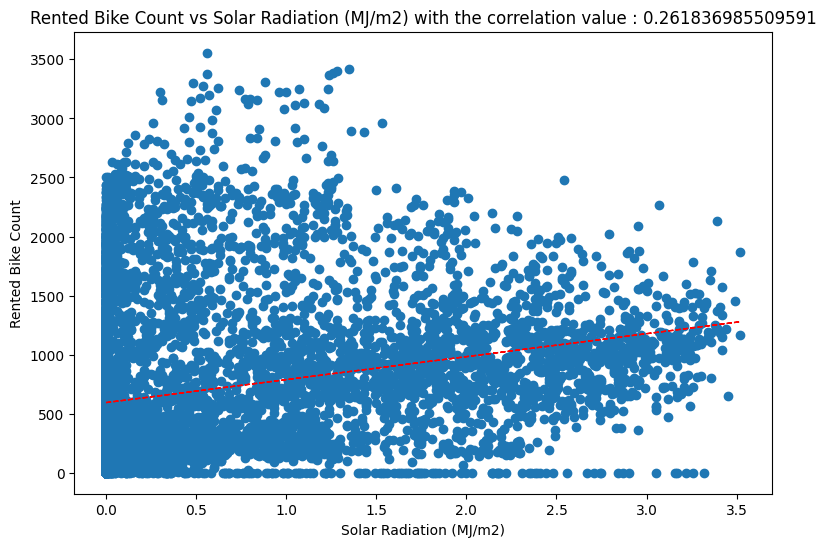

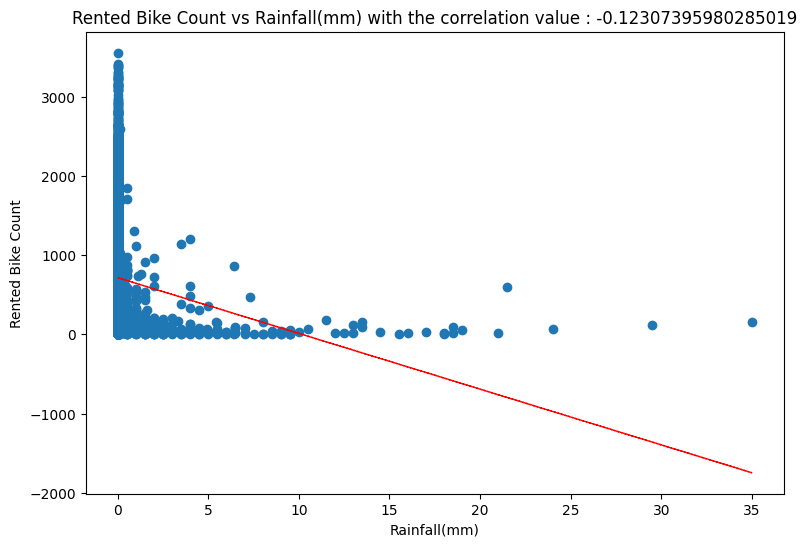

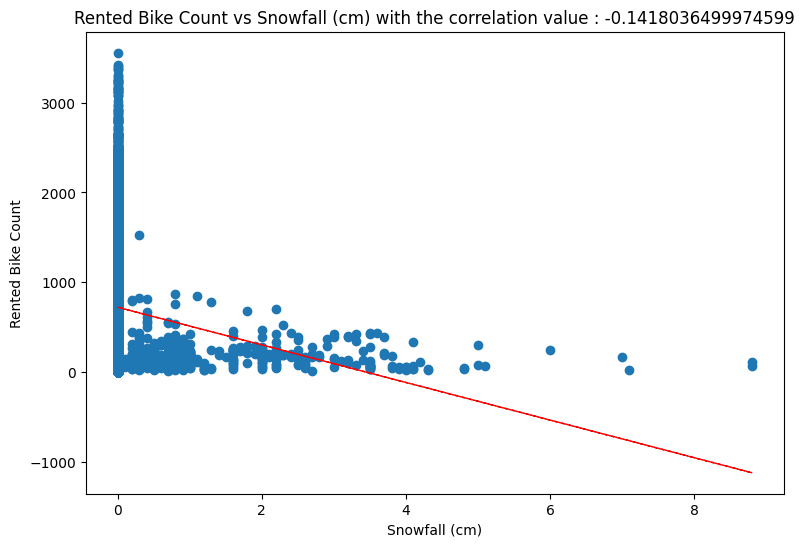

In [205]:
# Chart - 8 visualization code
for col in numeric_col[1:]:    # since rented bike count column is not included in this for loop
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = bike_df[col]
  correlation = feature.corr(bike_df['Rented Bike Count'])
  plt.scatter(x=feature, y= bike_df['Rented Bike Count'])
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs '+col+ ' with the correlation value : '+str(correlation))
  z= np.polyfit(bike_df[col],bike_df['Rented Bike Count'],1)
  y_hat = np.poly1d(z)(bike_df[col])
  plt.plot(bike_df[col],y_hat,'r--',lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

To understand the correlation of the columns wrt the dependent variable

##### 2. What is/are the insight(s) found from the chart?

From above scatter plot or Regression plot shows some numeric features has positive correlation with dependent variable and some has negative correlation

correlation of features with dependent feature :--

positive correlation = Temperature, wind speed, Visibility, Dew point temperature, solar radiation.

negative correlation = Humidity, Rainfall, snowfall

# **Chart : Correlation map**

<Axes: >

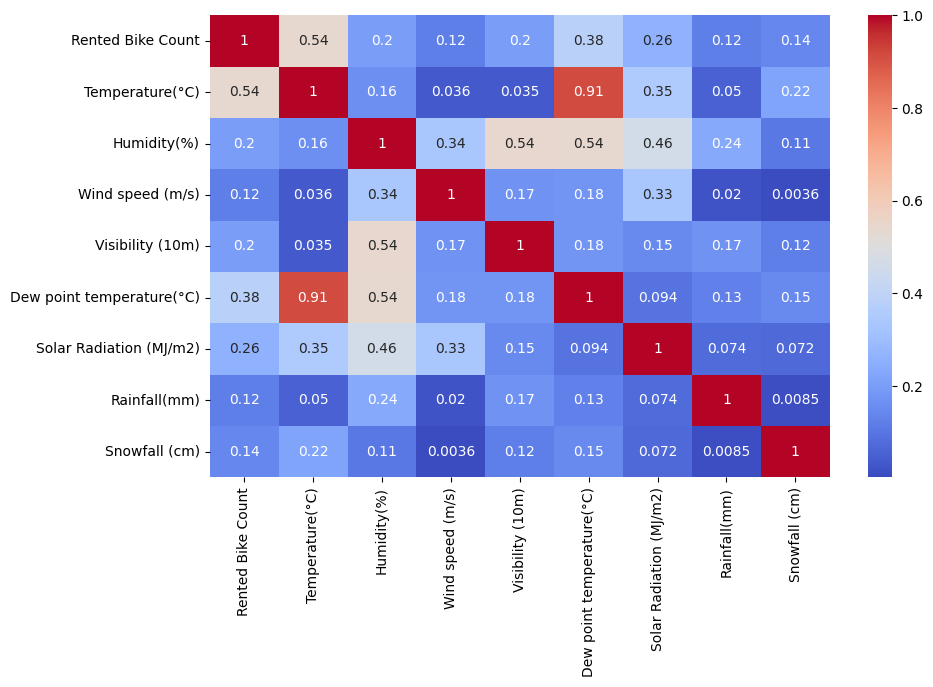

In [206]:
plt.figure(figsize=(10,6))
sns.heatmap(abs(bike_df.corr()), cmap='coolwarm', annot=True)

##### 1. Why did you pick the specific chart?

From this graph we are able to see that there is multicollinearity in temperature(°C) and dev point temperature(°C) column.

so we need to remove multicollinearity because :- Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of our regression model.

We have to remove the multicollinearity. To remove we can use VIF method

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [208]:
calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

Since VIF ( Variance inflation factor ) in general, a VIF above 10 indicates high correlation and is cause for concern.

If VIF <=3 means variables are less correlated and multicollinearity does not exist in the regression model.

So in our data, features are less correlated with each other so it does not causes more concern



## ***6. Feature Engineering & Data Pre-processing***

 using one hot encoding (get dummies) or Data encoding method.

Since performing feature encoding on = [ Hour, Seasons, Holiday, Functioning Day, Month, Week ]

In [209]:
bike_df1=pd.get_dummies(bike_df, drop_first=True, sparse=True )

In [210]:
bike_df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype           
---  ------                     --------------  -----           
 0   Rented Bike Count          8760 non-null   int64           
 1   Temperature(°C)            8760 non-null   float64         
 2   Humidity(%)                8760 non-null   int64           
 3   Wind speed (m/s)           8760 non-null   float64         
 4   Visibility (10m)           8760 non-null   int64           
 5   Dew point temperature(°C)  8760 non-null   float64         
 6   Solar Radiation (MJ/m2)    8760 non-null   float64         
 7   Rainfall(mm)               8760 non-null   float64         
 8   Snowfall (cm)              8760 non-null   float64         
 9   Hour_Evening               8760 non-null   Sparse[uint8, 0]
 10  Hour_Morning               8760 non-null   Sparse[uint8, 0]
 11  Hour_Night                 8760 non-null   

In [211]:
bike_df1.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Hour_Evening  ...  Month_December  \
0           0.0            0.0             0  ...               0   
1           0.0            0.0             0  ...               0   
2           0.0            0.0             0  ...               0   
3           0.0            0.0             0  ...               0   
4           0.0            0.0             0  ...               0   

   Month_February  Month_January  Month_July  Month_June  Month_March  \
0               0              1           0           0            0   
1               0              1           0           0            0   
2               0              1           0           0            0   
3               0              1           0           0            0   
4               0              1           0           0            0   

   Month_May  Month_November  Month_October  Month_September  
0          0               0              0                0  
1          0               0              0                0  
2          0               0              0                0  
3          0               0              0                0  
4          0               0              0                0  

[5 rows x 29 columns]

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Transforming the dependent variable ,because it is positively skewed

Text(0.5, 1.0, 'Rented Bike count by square trnasformation')

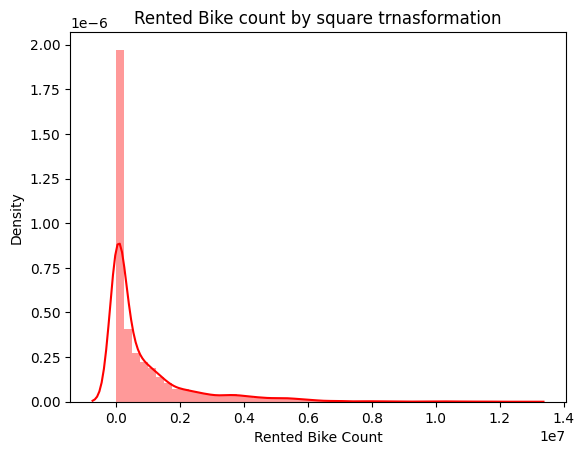

In [212]:
# Transform Your data
sns.distplot((bike_df1['Rented Bike Count']**2), color='red').set_title('Rented Bike count by square trnasformation')

Text(0.5, 1.0, 'Rented Bike count by square trnasformation')

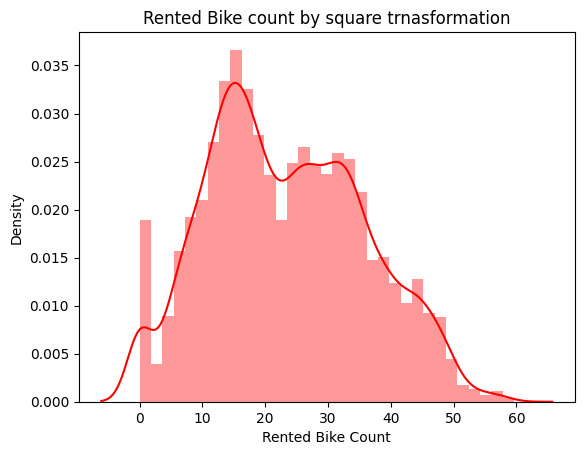

In [213]:
sns.distplot(np.sqrt(bike_df1['Rented Bike Count']), color='red').set_title('Rented Bike count by square trnasformation')

Square root transformation gives us the normal distribution from positively skewed data for dependent vairable.

***DIVIDING THE DATA AS INDEPENDENT AND DEPENDENT DATA ***

DEPENDENT VARIABLE   Y   = 'RENTED BIKE COUNT '

INDEPENDENT VARIABLE X   = 'ALL THE VARIABLE EXCEPT RENTED BIKE COUNT'

In [214]:
x= bike_df1.drop(columns=['Rented Bike Count'])
x=x.drop(columns=['Dew point temperature(°C)'])

In [215]:
y=np.sqrt(bike_df1['Rented Bike Count'])

SPLITING THE DATA INTO TRAIN AND TEST DATA

In [216]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=10)

In [217]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((7008, 27), (1752, 27), (7008,), (1752,))

## ***7. ML Model Implementation***

In [218]:

# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:

      # ploting the graph of feature importance

      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()

    except:
      pass

  # Here we appending the parameters for all models
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

# MODEL 1: LINEAR REGRESSION MODEL

Training score  = 0.7025535504935366
MAE : 5.272386430820542
MSE : 44.56236594756176
RMSE : 6.675504920795262
R2 : 0.7148244596355067
Adjusted R2 :  0.710358253376898 

********************************************************************************
coefficient 
 [ 5.14739061e-01 -1.60440217e-01  1.69953452e-01  4.57441937e-04
 -4.13789776e-01 -1.52974975e+00  2.01579845e-01  7.31211674e+00
  3.49567486e+00 -3.21438956e+00 -2.99970107e+00 -3.64819510e+00
 -7.78338929e+00  2.68685897e+00  2.81018498e+01 -2.31317794e+00
 -7.87198391e-01  1.60966727e-01 -5.04791687e-01  4.64717540e-01
 -1.68325928e-01  4.27666206e+00  3.81748543e-01  1.77063828e+00
  6.02248753e-01  2.11813392e+00 -7.33973592e-02]


Intercept  =  -0.3986021778997362


******************** ploting the graph of Actual and predicted only with 80 observation ********************


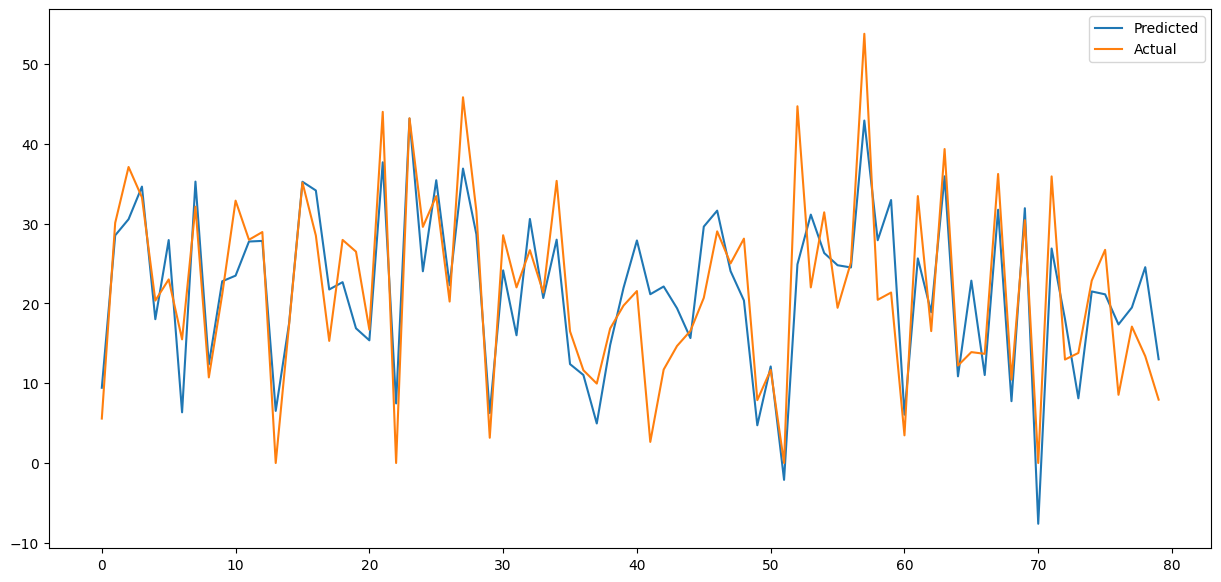

In [219]:
score_metrix (LinearRegression(),xtrain,xtest,ytrain,ytest)

Above linear regression model shows quite good results.

----> By observing training score we say that model is quite overfit.

----> We can increase accuracy of model by scaling or transforming the training data by either min max scaler or standard scalar or Power transformer.

# ML Model - 2 Linear regression with Powertransformer

Power transformations are very useful when we have to deal with skewed features and our model is sensitive to the symmetry of the distributions.

The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling. The transform(data) method is used to perform scaling using mean and std dev calculated using the . fit() method.

In [220]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
xtrain_trans = pt.fit_transform(xtrain)      # fit transform the training set
xtest_trans = pt.transform(xtest)

Training score  = 0.7350893725883549
MAE : 5.081760981637516
MSE : 41.82562872623285
RMSE : 6.467273670275045
R2 : 0.7323381283856463
Adjusted R2 :  0.7281462081225445 

********************************************************************************
coefficient 
 [ 5.6195918  -1.8740515   0.20494833  0.34124971  0.7702834  -3.14193845
  0.17619064  3.69840912  1.29910106 -1.07303138 -1.24671528 -1.47003418
 -3.38600144  0.57415003  5.09908908 -0.53957412 -0.28400118  0.01007336
 -0.19587902  0.00910469 -0.28515316  1.03204422 -0.1396788   0.47305477
  0.02245528  0.39520277 -0.06149673]


Intercept  =  23.598336127191143


******************** ploting the graph of Actual and predicted only with 80 observation ********************


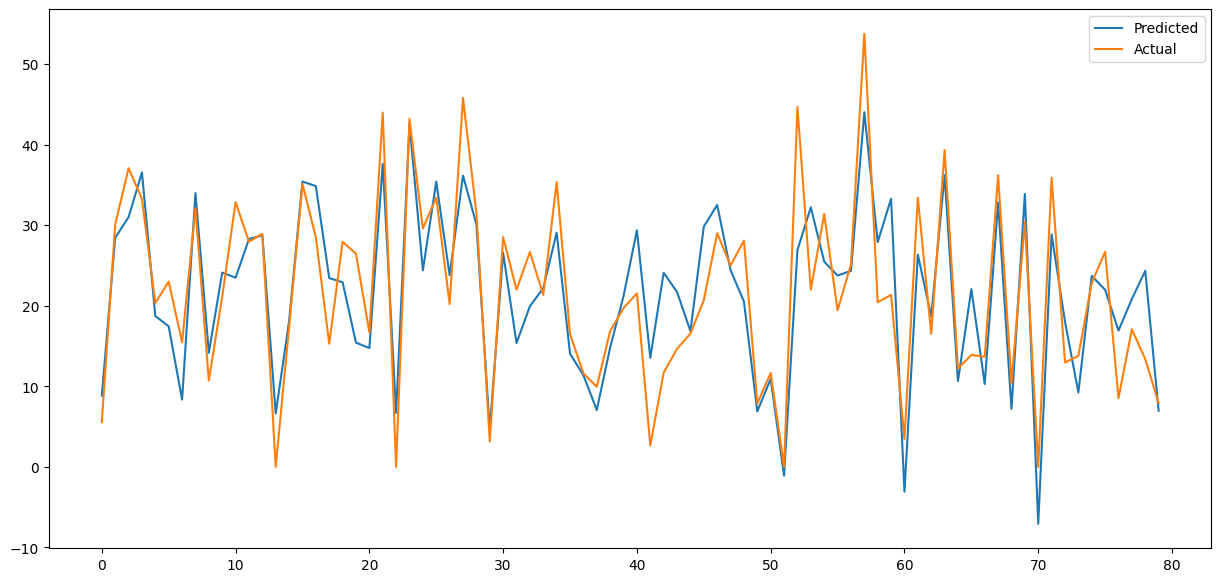

In [221]:
score_metrix(LinearRegression(),xtrain_trans,xtest_trans,ytrain,ytest)

# ML Model - 3 Linear regression with Standardscaler

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [224]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.preprocessing import StandardScaler
sl = StandardScaler()
xtrain_strans = sl.fit_transform(xtrain)      # fit transform the training set
xtest_strans = sl.transform(xtest)

Training score  = 0.7025535504935366
MAE : 5.272386430820545
MSE : 44.56236594756178
RMSE : 6.675504920795264
R2 : 0.7148244596355066
Adjusted R2 :  0.710358253376898 

********************************************************************************
coefficient 
 [ 6.11935124 -3.26373784  0.17643723  0.27712729 -0.3624353  -1.70973578
  0.08818173  3.1770087   1.3014211  -1.50697317 -1.3045431  -1.58980231
 -3.33295476  0.5876411   5.03817705 -0.6358316  -0.22008916  0.04503798
 -0.1334678   0.1268271  -0.04695446  1.17089209  0.1072143   0.49616653
  0.1646246   0.59798358 -0.02036468]


Intercept  =  23.598336127191146


******************** ploting the graph of Actual and predicted only with 80 observation ********************


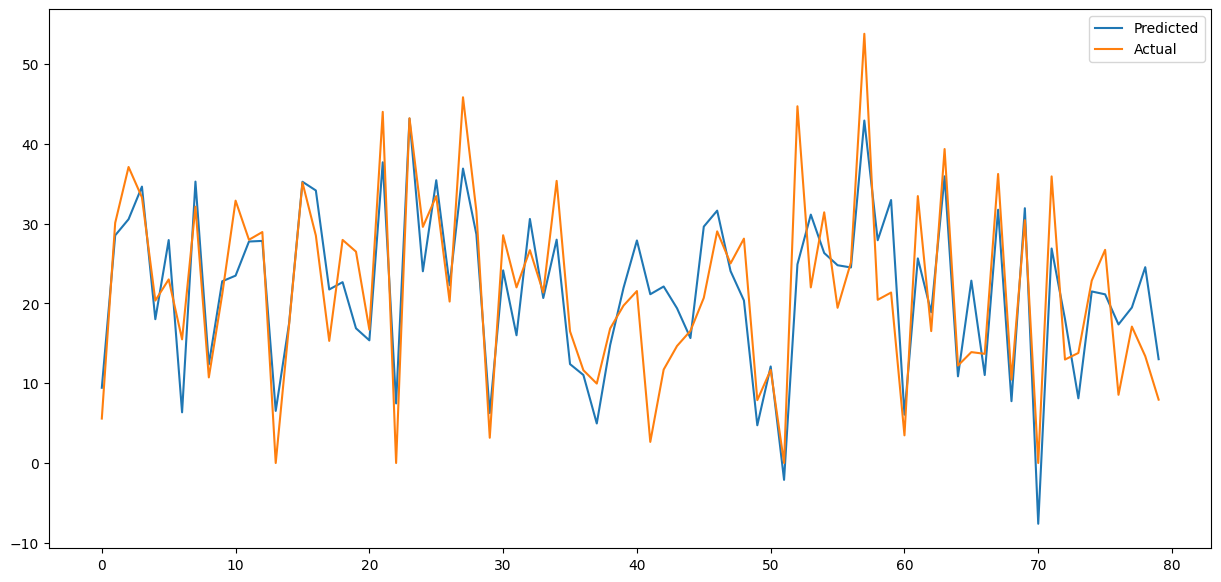

In [225]:
score_metrix(LinearRegression(),xtrain_strans,xtest_strans,ytrain,ytest)

# Model 4 :Linear Regression with polynomial features

Polynomial regression is a kind of linear regression in which the relationship shared between the dependent and independent variables Y and X is modeled as the nth degree of the polynomial.

In [228]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)                               #creating variable with degree 2
poly_xtrain = poly.fit_transform(xtrain_trans)                # fit the train set
poly_xtest = poly.transform(xtest_trans)                    #transform the test set


Training score  = 0.8409849039057424
MAE : 3.7984606042854523
MSE : 26.260078443291366
RMSE : 5.124458843945511
R2 : 0.8319494061672605
Adjusted R2 :  0.7812218663188648 

********************************************************************************
coefficient 
 [-2.62256030e+07  3.65356743e+00 -2.24672031e+00  2.52145143e-01
  4.50934626e-02 -7.42682723e-01  2.04606686e+00 -1.94179871e+10
 -9.86135236e+10 -2.16418919e+10 -9.34214687e+10 -1.65137807e+10
  7.17993276e+10 -5.15508591e+10  1.22373495e+11  3.98073819e+10
 -8.03622047e+10  1.97923365e+10 -5.31659100e+10  5.23684237e+10
 -9.67102110e+10  4.94033404e+10 -3.22255525e+10 -8.45190408e+09
  6.63671200e+09 -1.03013140e+10 -1.87579246e+10  1.52765999e+10
 -2.61754469e+00  4.70543824e-01 -1.74671393e-01  5.72450862e-01
  3.95041526e-01 -7.83357620e-02 -9.67855453e-01  1.27867603e+00
 -1.38930988e+00 -3.40538025e-01  2.28513718e-01 -2.00177479e+00
 -3.76148033e+00 -1.14702225e+00  2.43220901e+00 -2.13266373e-01
 -6.52977943e-01 -

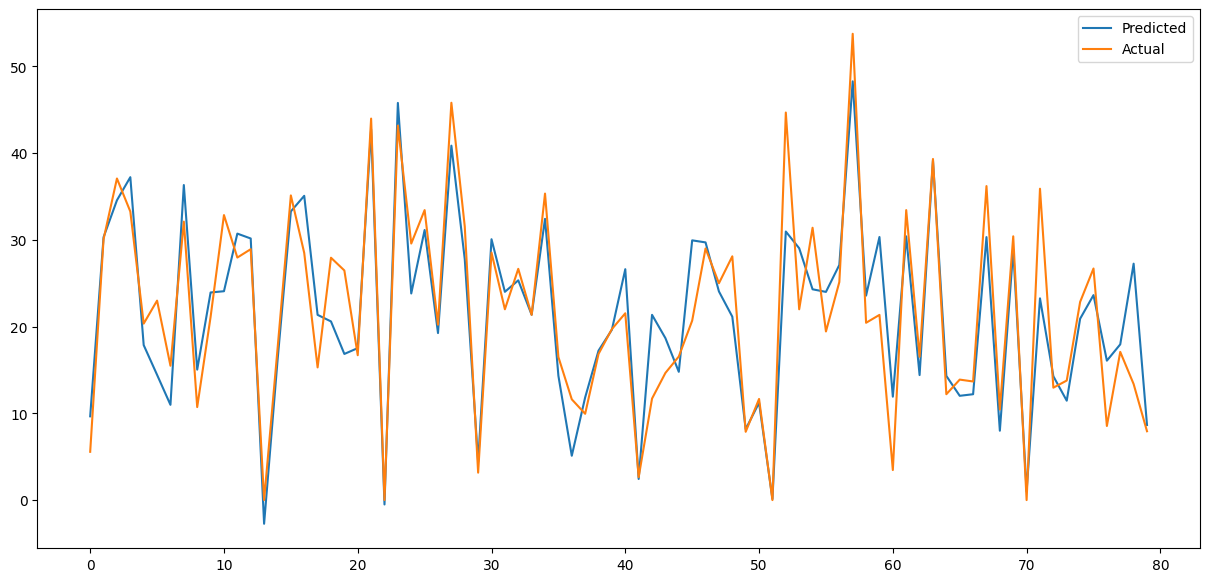

In [229]:
score_metrix(LinearRegression(),poly_xtrain,poly_xtest,ytrain,ytest)

# **Regularization**

Regularization is one of the most important concepts of machine learning. It is a technique to prevent the model from overfitting by adding extra information to it.

Two techniques of regularization are = **1) Lasso (l1 norm) and 2) Ridge regression (L2 norm)**

# Model 4: Ridge Regression

Training score  = 0.7350857300036486
The best parameters found out to be :{'alpha': 10} 
where model best score is:  0.7321484459424913 

MAE : 5.081672261352577
MSE : 41.81620442680659
RMSE : 6.466545014674111
R2 : 0.7323984389105542
Adjusted R2 :  0.7282074631858355 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


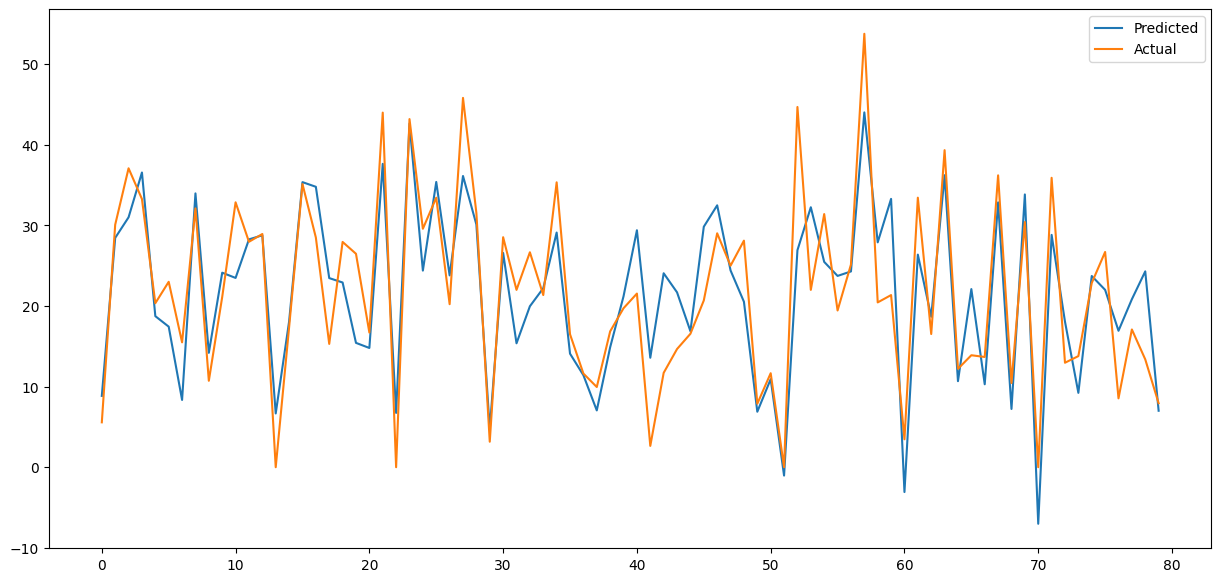

In [230]:
L2 = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}      # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5)                                                                    #using gridsearchcv and cross validate the model
score_metrix(L2_cv,xtrain_trans,xtest_trans,ytrain,ytest)

# Model : Lasso regression

In [231]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

Training score  = 0.7350625551639408
The best parameters found out to be :{'alpha': 0.01} 
where model best score is:  0.7321939783512486 

MAE : 5.079811518964977
MSE : 41.802365832489144
RMSE : 6.465474911596916
R2 : 0.7324869985848095
Adjusted R2 :  0.7282974098155461 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


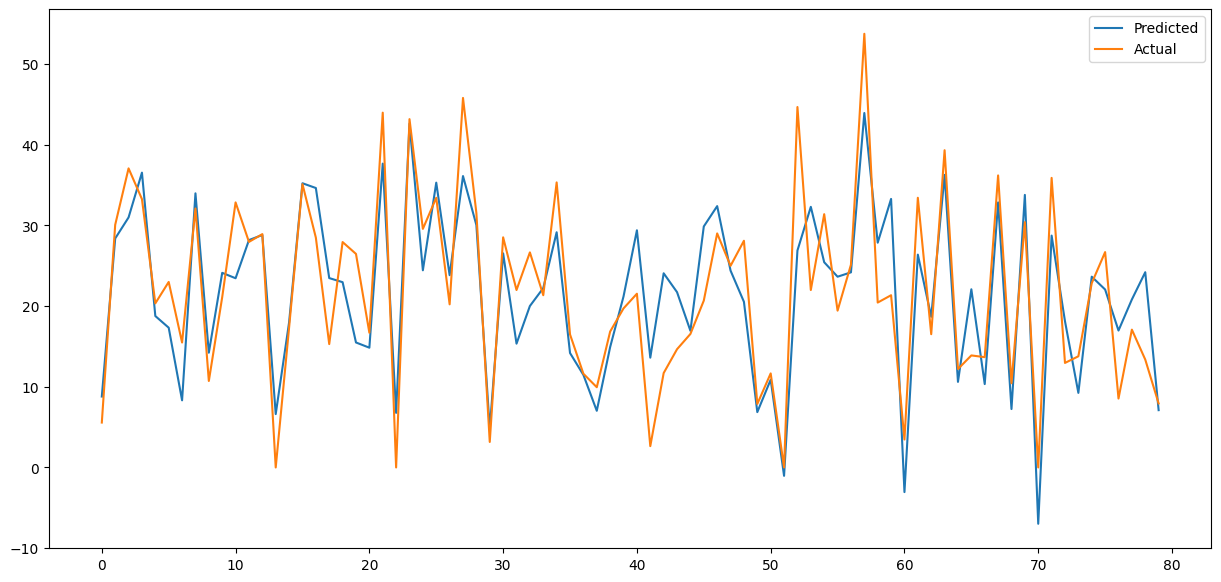

In [232]:
score_metrix(lasso_cv,xtrain_trans,xtest_trans,ytrain,ytest)

# Model : RANDOM FORREST REGRESSION

In [233]:
new_x=bike_df1.drop(columns='Rented Bike Count')
new_y=bike_df1['Rented Bike Count']

In [234]:
new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(new_x, new_y, test_size= 0.20, random_state = 10)


new_xtrain.shape,   new_xtest.shape,   new_ytrain.shape,  new_ytest.shape

((7008, 28), (1752, 28), (7008,), (1752,))

In [235]:
from sklearn.ensemble import RandomForestRegressor


# parameters for random forest regression model

rf_param_grid ={"n_estimators":[50,100,150],                    ### we can put any values for parameters
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}


# Using grid search cv
Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=rf_param_grid,n_jobs=-1,verbose=2)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Training score  = 0.9397951800433998
The best parameters found out to be :{'max_depth': 20, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 100} 
where model best score is:  0.823930048962119 

MAE : 169.26815659412347
MSE : 68858.08196097489
RMSE : 262.4082353146998
R2 : 0.8304233355797273
Adjusted R2 :  0.82766759175862 



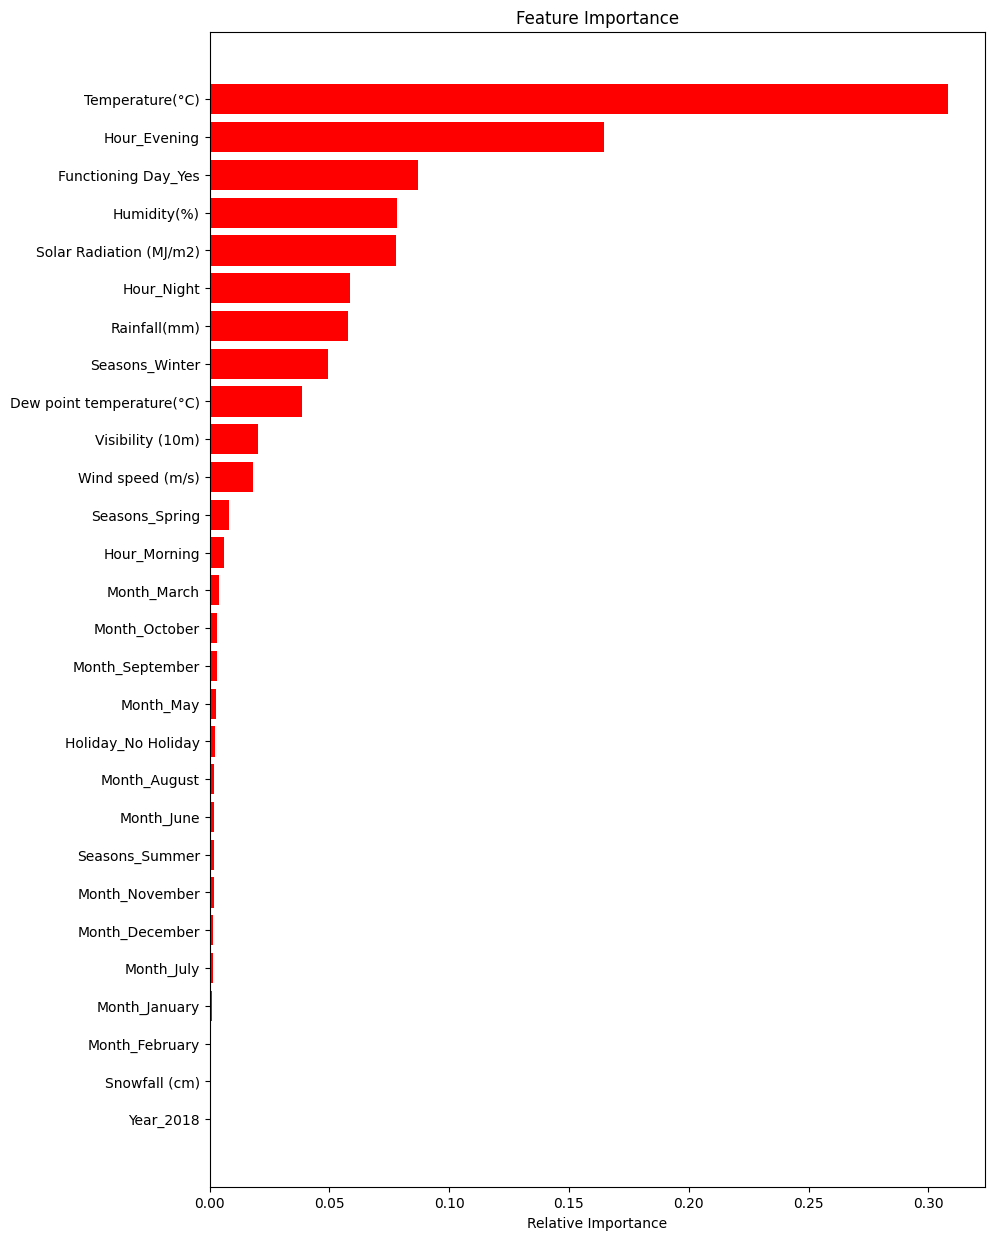

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


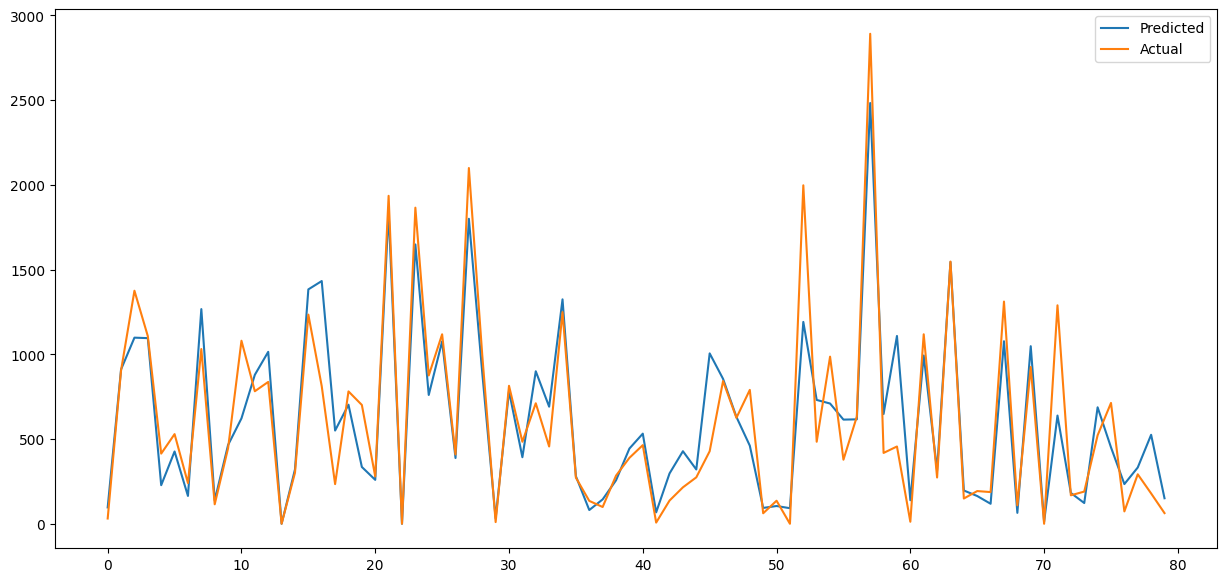

In [236]:
score_metrix(Ranom_forest_Grid_search, new_xtrain, new_xtest, new_ytrain, new_ytest)

# Model : DECISION TREE REGRESSION

Include all the columns

Since in decission tree multicollinearity of features does not affect the model accuracy. So in previous models we have removed multicollinear features (such as "Dew Point Temperature").


In [237]:
bike_df1.shape

(8760, 29)

In [238]:
from sklearn.tree import DecisionTreeRegressor


# Parameters for Decission Tree model
param_grid = {'criterion' : ["squared_error"],
              'splitter' : ["best", "random"],
              'max_depth' : [10,15,25, 'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

# Gridsearch CV
Dt_grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=2,n_jobs=-1)

Training score  = 0.8237654894256681
The best parameters found out to be :{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 24, 'min_samples_split': 50, 'splitter': 'best'} 
where model best score is:  0.7638799729766499 

MAE : 198.77941857500585
MSE : 90008.09468329092
RMSE : 300.01349083548047
R2 : 0.7783372404147566
Adjusted R2 :  0.77473505975986 



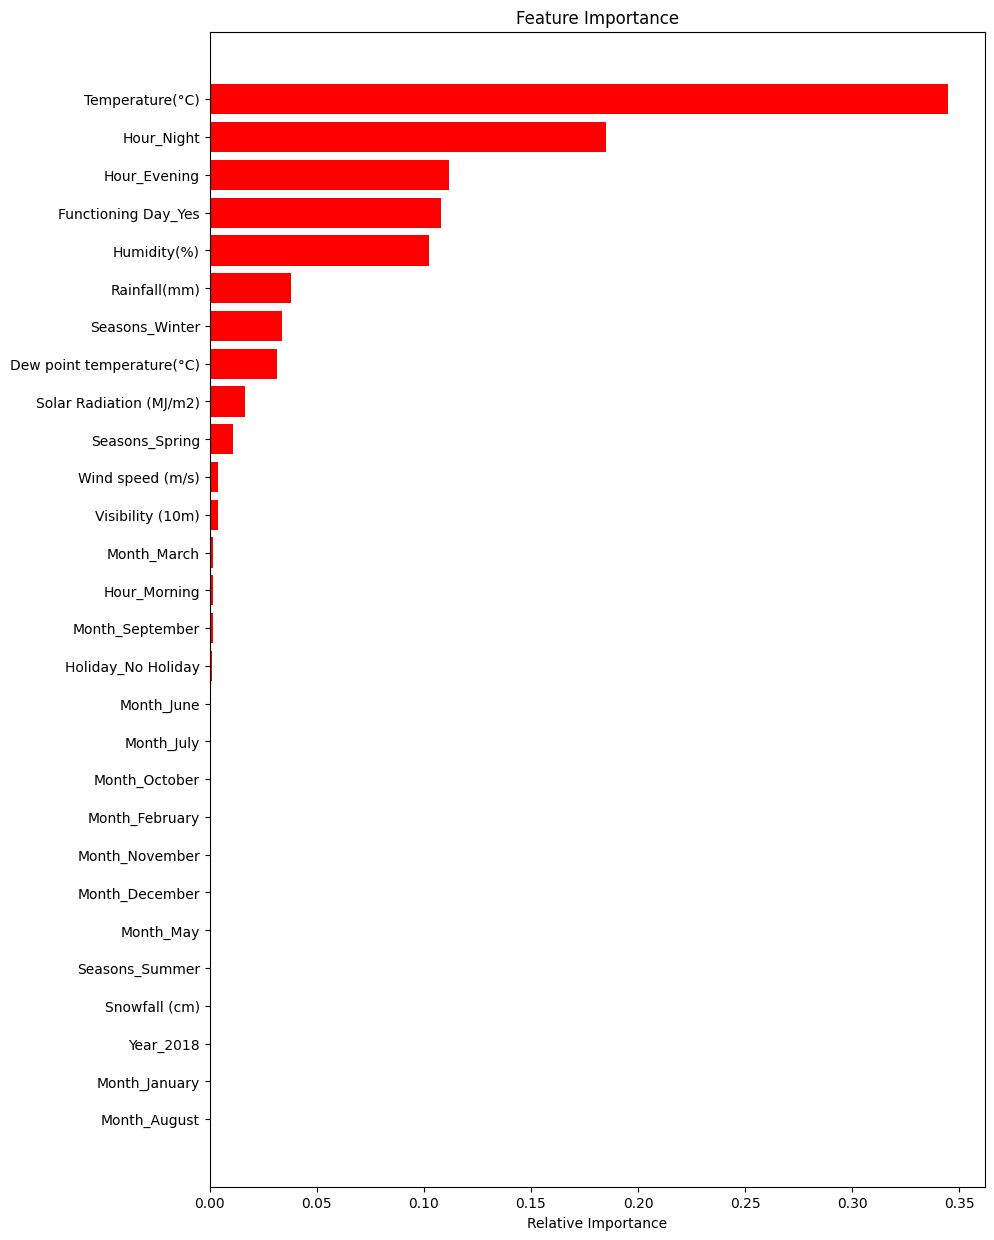

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


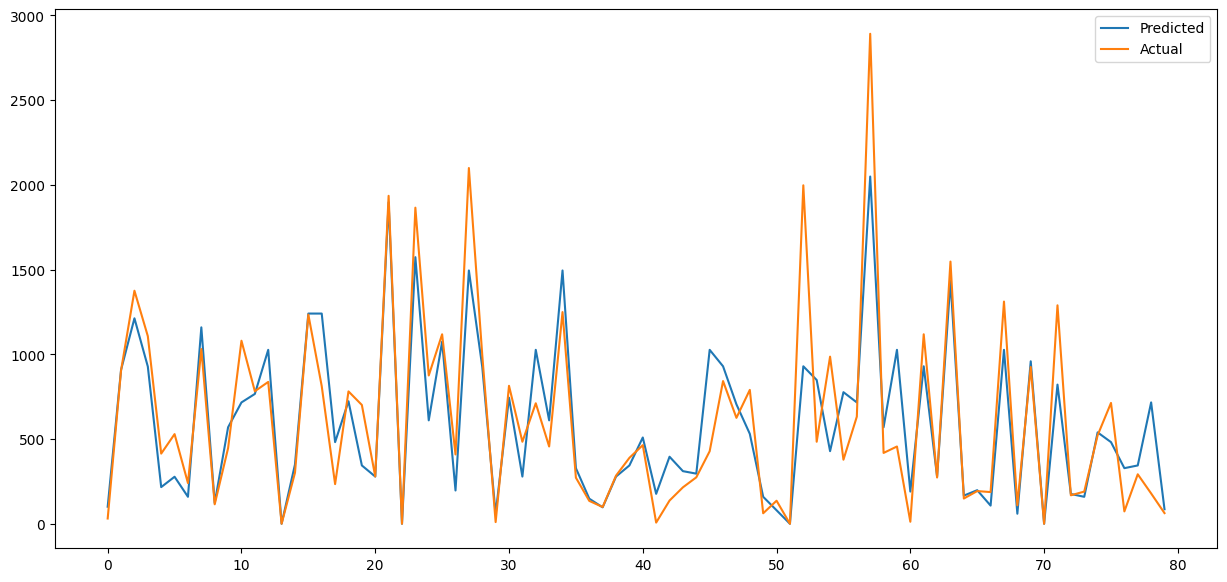

In [239]:
score_metrix(Dt_grid_search,new_xtrain,new_xtest,new_ytrain,new_ytest)

# **Conclusion**

# **EDA Insights :-**

1)  Bikes have been used more often in weekdays than weekends

2) 98% of the bikes are rented when there is non Holiday day present. That means Most of the user may use bike on rent to go there respective work places.

3) More number of bikes are rented in the Summer season and the lowest in the winter season.

4)- Most number of bikes are rented when there is no snowfall or rainfall.

5)- Peak rise in 8th and 18th hour

6)- Gradual Increase in bike rent count is in morning 6 to 10 am i.e. it must be working time of employees. And after 10 am there slight decrease in count, And again start increasing count rate from 16 to 20 (4pm to 8pm) i.e. it must be leaving time of employees and they uses bike on rent to go there home.

7)- The highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.

8)- Most of the bike rentals have been made when there is high visibility.

9)- In 2018 demand for Rented bikes is increased as compare to 2017 year. It may be because in 2017 people are aware about rented bike facility.

# **ML MODEL INSIGHTS**

# Linear regression with original x train test and y train test

    Training score  = 0.7025535504935366
    MAE : 5.272386430820542
    MSE : 44.56236594756176
    RMSE : 6.675504920795262
    R2 : 0.7148244596355067
    Adjusted R2 :  0.710358253376898


# **Linear regression with powertransformer**

    Training score  = 0.7350893725883549
    MAE : 5.081760981637516
    MSE : 41.82562872623285
    RMSE : 6.467273670275045
    R2 : 0.7323381283856463
    Adjusted R2 :  0.7281462081225445

# **Linear regression with Standardscaler**
    Training score  = 0.7025535504935366
    MAE : 5.272386430820545
    MSE : 44.56236594756178
    RMSE : 6.675504920795264
    R2 : 0.7148244596355066
    Adjusted R2 :  0.710358253376898

# **Linear regression with Polynomial features**
    Training score  = 0.8409849039057424
    MAE : 3.7984606042854523
    MSE : 26.260078443291366
    RMSE : 5.124458843945511
    R2 : 0.8319494061672605
    Adjusted R2 :  0.7812218663188648

#**Ridge Regression**

The best parameters found out to be :{'alpha': 10}

where model best score is:  0.7321484459424913

    Training score  = 0.7350857300036486
    MAE : 5.081672261352577
    MSE : 41.81620442680659
    RMSE : 6.466545014674111
    R2 : 0.7323984389105542
    Adjusted R2 :  0.7282074631858355     

#**Lasso Regression**


The best parameters found out to be :{'alpha': 0.01}

where model best score is:  0.7321939783512486

    Training score  = 0.7350625551639408
    MAE : 5.079811518964977
    MSE : 41.802365832489144
    RMSE : 6.465474911596916
    R2 : 0.7324869985848095
    Adjusted R2 :  0.7282974098155461

#**Randomforrest Regression**


The best parameters found out to be :{'max_depth': 25, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 150}

where model best score is:  0.8237031376924666

    Training score  = 0.9416053146851839
    MAE : 169.6591645191808
    MSE : 68890.38858227018
    RMSE : 262.4697860369269
    R2 : 0.8303437741263449
    Adjusted R2 :  0.8275867373739001


#**Decision Tree Regression**


The best parameters found out to be :{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 35, 'min_samples_split': 50, 'splitter': 'best'}

where model best score is:  0.7589229343218231

    Training score  = 0.8303549823331889
    MAE : 189.78425743618234
    MSE : 82961.48773177019
    RMSE : 288.03035904531
    R2 : 0.7956909056387869
    Adjusted R2 :  0.7923707346334973



By Observing Insights of models we can conclude that :-

1)- Random Forest Regression is the best model with an increased accuracy to predict bike rent count. i.e. R2 score of 0.83034....

2)- Linear reagression model is the worst performing model with an r2 score of 0.71035...

Actual vs Prediction visualisation is done for all the 6 models.

 Temperature and Hour are the two most important factors according to all the models. And they are very useful while predicting the bike rented count.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***